In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",500)

# 1. Data Loading and Basic Analysis

## Load the dataset

In [4]:
loan_data = pd.read_csv('loan 2.csv',low_memory=False)

## Display the first 5 rows

In [6]:
print("First 5 rows of loan_data:")
loan_data.head()

First 5 rows of loan_data:


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

## Print the column names and their data types

In [8]:
print("\nColumn names and their data types for loan_data:")
loan_data.info(verbose=True)


Column names and their data types for loan_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_s

# 2. Data Cleaning

## Get the number of null values for each column

In [11]:
print("\nNumber of null values for each column in loan_data:")
loan_data.isnull().sum()


Number of null values for each column in loan_data:


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


## To find and display the percentage of the null values in all columns

In [13]:
missingvaluepercentage = 100*loan_data.isnull().sum()/len(loan_data)
missingvaluepercentage.sort_values(ascending=False)

verification_status_joint         100.000000
annual_inc_joint                  100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_old_il_acct                100.000000
bc_util                           100.000000
bc_open_to_buy                    100.000000
avg_cur_bal                       100.000000
acc_open_past_24mths              100.000000
inq_last_12m                      100.000000
total_cu_tl                       100.000000
inq_fi                            100.000000
total_rev_hi_lim                  100.000000
all_util                          100.000000
max_bal_bc                        100.000000
open_rv_24m                       100.000000
open_rv_12m                       100.000000
il_util                           100.000000
total_bal_il                      100.000000
mths_since_rcnt_il                100.000000
open_il_24m                       100.000000
open_il_12m                       100.000000
open_il_6m                        100.000000
open_acc_6

## Removing the columns whose percentage of null values is greater than 50 %

In [15]:
loan_data_clean=loan_data.loc[:,missingvaluepercentage < 50]
loan_data_clean.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

## Lets check the data after removing columns

In [17]:
loan_data_clean.shape 

(39717, 54)

In [18]:
loan_data_clean.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648     83.70%   
1           Apr-99               5         3        0       1687      9.40%   
2           Nov-01               2         2        0       2956     98.50%   
3           Feb-96               1        10        0       5598        21%   
4           Jan-96               0        15        0      27783     53.90%   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0          9                   f       0.00           0.00   5863.155187   
1          4                   f       0.00           0.00   1008.710000   
2         10                   f       0.00           0.00   3005.666844   
3         37                   f       0.00           0.00  12231.890000   
4         38                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   

## Check statistical information of all columns

In [20]:
loan_data_clean.describe(include="all")

id     member_id     loan_amnt   funded_amnt  \
count   3.971700e+04  3.971700e+04  39717.000000  39717.000000   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean    6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std     2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min     5.473400e+04  7.069900e+04    500.000000    500.000000   
25%     5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%     6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%     8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max     1.077501e+06  1.314167e+06  35000.000000  35000.000000   

        funded_amnt_inv        term int_rate   installment  grade sub_grade  \
count      39717.000000       39717    39717  39717.000000  39717     39717   
unique              NaN           2      371           NaN      7        35   
top                 NaN   36 months   10.99%           NaN      B        B3   
freq                NaN       29096      956           NaN  12020      2917   
mean       10397.448868         NaN      NaN    324.561922    NaN       NaN   
std         7128.450439         NaN      NaN    208.874874    NaN       NaN   
min            0.000000         NaN      NaN     15.690000    NaN       NaN   
25%         5000.000000         NaN      NaN    167.020000    NaN       NaN   
50%         8975.000000         NaN      NaN    280.220000    NaN       NaN   
75%        14400.000000         NaN      NaN    430.780000    NaN       NaN   
max        35000.000000         NaN      NaN   1305.190000    NaN       NaN   

       emp_title emp_length home_ownership    annual_inc verification_status  \
count      37258      38642          39717  3.971700e+04               39717   
unique     28820         11              5           NaN                   3   
top      US Army  10+ years           RENT           NaN        Not Verified   
freq         134       8879          18899           NaN               16921   
mean         NaN        NaN            NaN  6.896893e+04                 NaN   
std          NaN        NaN            NaN  6.379377e+04                 NaN   
min          NaN        NaN            NaN  4.000000e+03                 NaN   
25%          NaN        NaN            NaN  4.040400e+04                 NaN   
50%          NaN        NaN            NaN  5.900000e+04                 NaN   
75%          NaN        NaN            NaN  8.230000e+04                 NaN   
max          NaN        NaN            NaN  6.000000e+06                 NaN   

       issue_d loan_status pymnt_plan  \
count    39717       39717      39717   
unique      55           3          1   
top     Dec-11  Fully Paid          n   
freq      2260       32950      39717   
mean       NaN         NaN        NaN   
std        NaN         NaN        NaN   
min        NaN         NaN        NaN   
25%        NaN         NaN        NaN   
50%        NaN         NaN        NaN   
75%        NaN         NaN        NaN   
max        NaN         NaN        NaN   

                                                      url   desc  \
count                                               39717  26775   
unique                                              39717  26526   
top     https://lendingclub.com/browse/loanDetail.acti...          
freq                                                    1    210   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

     

In [21]:
nullvalues = 100*loan_data_clean.isnull().sum()/len(loan_data_clean)
nullvalues.sort_values(ascending=False)

desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
total_rec_prncp                0.000000
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_acc                      0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
collection_recovery_fee        0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
pub_rec                        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000


## Lets add missing values

In [23]:
loan_data_clean["pub_rec_bankruptcies"].fillna(loan_data_clean["pub_rec_bankruptcies"].median(), inplace=True);
loan_data_clean["chargeoff_within_12_mths"].fillna(loan_data_clean["chargeoff_within_12_mths"].median(), inplace=True);
loan_data_clean["collections_12_mths_ex_med"].fillna(loan_data_clean["collections_12_mths_ex_med"].median(), inplace=True);
loan_data_clean["tax_liens"].fillna(loan_data_clean["tax_liens"].median(), inplace=True);

loan_data_clean["desc"].fillna(loan_data_clean["desc"].mode()[0], inplace=True);
loan_data_clean["emp_title"].fillna(loan_data_clean["emp_title"].mode()[0], inplace=True);
loan_data_clean["emp_length"].fillna(loan_data_clean["emp_length"].mode()[0], inplace=True);
loan_data_clean["last_pymnt_d"].fillna(loan_data_clean["last_pymnt_d"].mode()[0], inplace=True);
loan_data_clean["revol_util"].fillna(loan_data_clean["revol_util"].mode()[0], inplace=True);
loan_data_clean["title"].fillna(loan_data_clean["title"].mode(), inplace=True);
loan_data_clean["last_credit_pull_d"].fillna(loan_data_clean["last_credit_pull_d"].mode()[0], inplace=True);

In [24]:
loan_data_clean.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                   US Army  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                   US Army  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                     small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648     83.70%   
1           Apr-99               5         3        0       1687      9.40%   
2           Nov-01               2         2        0       2956     98.50%   
3           Feb-96               1        10        0       5598        21%   
4           Jan-96               0        15        0      27783     53.90%   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0          9                   f       0.00           0.00   5863.155187   
1          4                   f       0.00           0.00   1008.710000   
2         10                   f       0.00           0.00   3005.666844   
3         37                   f       0.00           0.00  12231.890000   
4         38                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   

## Lets identify and delete all the columns which value is unique in nature.
## Will drop them as it wont add any contribution in analysis

In [26]:
unique_columns = [col for col in loan_data_clean.columns if loan_data_clean[col].nunique() == len(loan_data_clean)]

unique_columns

['id', 'member_id', 'url']

In [27]:
loan_data_clean.drop(['url','member_id','id'],axis=1, inplace=True)

loan_data_clean

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
4           3000         3000           3000.0   60 months   12.69%   
...          ...          ...              ...         ...      ...   
39712       2500         2500           1075.0   36 months    8.07%   
39713       8500         8500            875.0   36 months   10.28%   
39714       5000         5000           1325.0   36 months    8.07%   
39715       5000         5000            650.0   36 months    7.43%   
39716       7500         7500            800.0   36 months   13.75%   

       installment grade sub_grade                   emp_title emp_length  \
0           162.87     B        B2                     US Army  10+ years   
1            59.83     C        C4                       Ryder   < 1 year   
2            84.33     C        C5                     US Army  10+ years   
3           339.31     C        C1         AIR RESOURCES BOARD  10+ years   
4            67.79     B        B5    University Medical Group     1 year   
...            ...   ...       ...                         ...        ...   
39712        78.42     A        A4             FiSite Research    4 years   
39713       275.38     C        C1  Squarewave Solutions, Ltd.    3 years   
39714       156.84     A        A4                     US Army   < 1 year   
39715       155.38     A        A2                     US Army   < 1 year   
39716       255.43     E        E2            Evergreen Center   < 1 year   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
0               RENT     24000.0            Verified  Dec-11   Fully Paid   
1               RENT     30000.0     Source Verified  Dec-11  Charged Off   
2               RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3               RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4               RENT     80000.0     Source Verified  Dec-11      Current   
...              ...         ...                 ...     ...          ...   
39712       MORTGAGE    110000.0        Not Verified  Jul-07   Fully Paid   
39713           RENT     18000.0        Not Verified  Jul-07   Fully Paid   
39714       MORTGAGE    100000.0        Not Verified  Jul-07   Fully Paid   
39715       MORTGAGE    200000.0        Not Verified  Jul-07   Fully Paid   
39716            OWN     22000.0        Not Verified  Jun-07   Fully Paid   

      pymnt_plan                                               desc  \
0              n    Borrower added on 12/22/11 > I need to upgra...   
1              n    Borrower added on 12/22/11 > I plan to use t...   
2              n                                                      
3              n    Borrower added on 12/21/11 > to pay for prop...   
4              n    Borrower added on 12/21/11 > I plan on combi...   
...          ...                                                ...   
39712          n  Our current gutter system on our home is old a...   
39713          n  The rate of interest and fees incurred by carr...   
39714          n                                                      
39715          n                                                      
39716          n  I plan to consolidate over $7,000 of debt: a c...   

                  purpose                      title zip_code addr_state  \
0             credit_card                   Computer    860xx         AZ   
1                     car                       bike    309xx         GA   
2          small_business       real estate business    606xx         IL   
3                   other                   personel    917xx         CA   
4                   other                   Personal    972xx         O

## Removing the columns that are not part of the loan approval process

In [29]:
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan_data_clean=loan_data_clean.drop(behavioural_cols,axis=1)

loan_data_clean

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
4           3000         3000           3000.0   60 months   12.69%   
...          ...          ...              ...         ...      ...   
39712       2500         2500           1075.0   36 months    8.07%   
39713       8500         8500            875.0   36 months   10.28%   
39714       5000         5000           1325.0   36 months    8.07%   
39715       5000         5000            650.0   36 months    7.43%   
39716       7500         7500            800.0   36 months   13.75%   

       installment grade sub_grade                   emp_title emp_length  \
0           162.87     B        B2                     US Army  10+ years   
1            59.83     C        C4                       Ryder   < 1 year   
2            84.33     C        C5                     US Army  10+ years   
3           339.31     C        C1         AIR RESOURCES BOARD  10+ years   
4            67.79     B        B5    University Medical Group     1 year   
...            ...   ...       ...                         ...        ...   
39712        78.42     A        A4             FiSite Research    4 years   
39713       275.38     C        C1  Squarewave Solutions, Ltd.    3 years   
39714       156.84     A        A4                     US Army   < 1 year   
39715       155.38     A        A2                     US Army   < 1 year   
39716       255.43     E        E2            Evergreen Center   < 1 year   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
0               RENT     24000.0            Verified  Dec-11   Fully Paid   
1               RENT     30000.0     Source Verified  Dec-11  Charged Off   
2               RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3               RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4               RENT     80000.0     Source Verified  Dec-11      Current   
...              ...         ...                 ...     ...          ...   
39712       MORTGAGE    110000.0        Not Verified  Jul-07   Fully Paid   
39713           RENT     18000.0        Not Verified  Jul-07   Fully Paid   
39714       MORTGAGE    100000.0        Not Verified  Jul-07   Fully Paid   
39715       MORTGAGE    200000.0        Not Verified  Jul-07   Fully Paid   
39716            OWN     22000.0        Not Verified  Jun-07   Fully Paid   

      pymnt_plan                                               desc  \
0              n    Borrower added on 12/22/11 > I need to upgra...   
1              n    Borrower added on 12/22/11 > I plan to use t...   
2              n                                                      
3              n    Borrower added on 12/21/11 > to pay for prop...   
4              n    Borrower added on 12/21/11 > I plan on combi...   
...          ...                                                ...   
39712          n  Our current gutter system on our home is old a...   
39713          n  The rate of interest and fees incurred by carr...   
39714          n                                                      
39715          n                                                      
39716          n  I plan to consolidate over $7,000 of debt: a c...   

                  purpose                      title zip_code addr_state  \
0             credit_card                   Computer    860xx         AZ   
1                     car                       bike    309xx         GA   
2          small_business       real estate business    606xx         IL   
3                   other                   personel    917xx         CA   
4                   other                   Personal    972xx         O

## Post cleaning the dataset lets identify the columns with unique values.

In [31]:
loan_data_clean.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                       

In [32]:
unique_counts = loan_data_clean.nunique().sort_values()
# Filter out columns where the number of unique values is 1
columns_to_drop = unique_counts[unique_counts == 1].index
# Drop these columns from the DataFrame
loan_data_clean = loan_data_clean.drop(columns=columns_to_drop)

loan_data_clean

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
4           3000         3000           3000.0   60 months   12.69%   
...          ...          ...              ...         ...      ...   
39712       2500         2500           1075.0   36 months    8.07%   
39713       8500         8500            875.0   36 months   10.28%   
39714       5000         5000           1325.0   36 months    8.07%   
39715       5000         5000            650.0   36 months    7.43%   
39716       7500         7500            800.0   36 months   13.75%   

       installment grade sub_grade                   emp_title emp_length  \
0           162.87     B        B2                     US Army  10+ years   
1            59.83     C        C4                       Ryder   < 1 year   
2            84.33     C        C5                     US Army  10+ years   
3           339.31     C        C1         AIR RESOURCES BOARD  10+ years   
4            67.79     B        B5    University Medical Group     1 year   
...            ...   ...       ...                         ...        ...   
39712        78.42     A        A4             FiSite Research    4 years   
39713       275.38     C        C1  Squarewave Solutions, Ltd.    3 years   
39714       156.84     A        A4                     US Army   < 1 year   
39715       155.38     A        A2                     US Army   < 1 year   
39716       255.43     E        E2            Evergreen Center   < 1 year   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
0               RENT     24000.0            Verified  Dec-11   Fully Paid   
1               RENT     30000.0     Source Verified  Dec-11  Charged Off   
2               RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3               RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4               RENT     80000.0     Source Verified  Dec-11      Current   
...              ...         ...                 ...     ...          ...   
39712       MORTGAGE    110000.0        Not Verified  Jul-07   Fully Paid   
39713           RENT     18000.0        Not Verified  Jul-07   Fully Paid   
39714       MORTGAGE    100000.0        Not Verified  Jul-07   Fully Paid   
39715       MORTGAGE    200000.0        Not Verified  Jul-07   Fully Paid   
39716            OWN     22000.0        Not Verified  Jun-07   Fully Paid   

                                                    desc             purpose  \
0        Borrower added on 12/22/11 > I need to upgra...         credit_card   
1        Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                             small_business   
3        Borrower added on 12/21/11 > to pay for prop...               other   
4        Borrower added on 12/21/11 > I plan on combi...               other   
...                                                  ...                 ...   
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                     debt_consolidation   
39715                                                                  other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state    dti  \
0                       Computer    860xx         AZ  27.65   
1                           bike    309xx         GA   1.00   
2           real estate business    606xx         IL   8.72   
3                       personel    917xx         CA  20.00   
4                       Pers

## Identifying the numerical/categorical columns

In [34]:
# Identifying the numerical columns
numeric_cols=loan_data_clean.select_dtypes(include=["float64","int64"]).columns
numeric_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [35]:
# Identifying the categorical columns
categorical_cols=loan_data_clean.select_dtypes(include=["object"]).columns
categorical_cols

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state'],
      dtype='object')

## Identify the distinct status of loan.
## Remove the rows corresponding to current as we don't need them to identify the defaulted status.

In [37]:
loan_data_clean['loan_status'].value_counts() 

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [38]:
# we can eliminate the rows corresponding to current as we don't need them to identify the defaulted status 

loan_data_clean=loan_data_clean[loan_data_clean['loan_status']!='Current']

loan_data_clean

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
5           5000         5000           5000.0   36 months    7.90%   
...          ...          ...              ...         ...      ...   
39712       2500         2500           1075.0   36 months    8.07%   
39713       8500         8500            875.0   36 months   10.28%   
39714       5000         5000           1325.0   36 months    8.07%   
39715       5000         5000            650.0   36 months    7.43%   
39716       7500         7500            800.0   36 months   13.75%   

       installment grade sub_grade                   emp_title emp_length  \
0           162.87     B        B2                     US Army  10+ years   
1            59.83     C        C4                       Ryder   < 1 year   
2            84.33     C        C5                     US Army  10+ years   
3           339.31     C        C1         AIR RESOURCES BOARD  10+ years   
5           156.46     A        A4        Veolia Transportaton    3 years   
...            ...   ...       ...                         ...        ...   
39712        78.42     A        A4             FiSite Research    4 years   
39713       275.38     C        C1  Squarewave Solutions, Ltd.    3 years   
39714       156.84     A        A4                     US Army   < 1 year   
39715       155.38     A        A2                     US Army   < 1 year   
39716       255.43     E        E2            Evergreen Center   < 1 year   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
0               RENT     24000.0            Verified  Dec-11   Fully Paid   
1               RENT     30000.0     Source Verified  Dec-11  Charged Off   
2               RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3               RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5               RENT     36000.0     Source Verified  Dec-11   Fully Paid   
...              ...         ...                 ...     ...          ...   
39712       MORTGAGE    110000.0        Not Verified  Jul-07   Fully Paid   
39713           RENT     18000.0        Not Verified  Jul-07   Fully Paid   
39714       MORTGAGE    100000.0        Not Verified  Jul-07   Fully Paid   
39715       MORTGAGE    200000.0        Not Verified  Jul-07   Fully Paid   
39716            OWN     22000.0        Not Verified  Jun-07   Fully Paid   

                                                    desc             purpose  \
0        Borrower added on 12/22/11 > I need to upgra...         credit_card   
1        Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                             small_business   
3        Borrower added on 12/21/11 > to pay for prop...               other   
5                                                                    wedding   
...                                                  ...                 ...   
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                     debt_consolidation   
39715                                                                  other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                                       title zip_code addr_state    dti  \
0                                   Computer    860xx         AZ  27.65   
1                                       bike    309xx         GA   1.00   
2                       real estate business    606xx         IL   8.72   
3                                   persone

## Column values cleaning for term and int_rate , also converting them to numeric type

In [40]:
# Based on the above summary we see term contains months which can be converted to numeric values
# int_rate contains % and we can remove the percentage and convert it numeric values

loan_data_clean['term'] = loan_data_clean['term'].str.replace(' months', '').astype(int)


In [41]:
loan_data_clean['int_rate'] = loan_data_clean['int_rate'].str.replace('%', '').astype(float)

In [42]:
loan_data_clean

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           5000         5000           4975.0    36     10.65       162.87   
1           2500         2500           2500.0    60     15.27        59.83   
2           2400         2400           2400.0    36     15.96        84.33   
3          10000        10000          10000.0    36     13.49       339.31   
5           5000         5000           5000.0    36      7.90       156.46   
...          ...          ...              ...   ...       ...          ...   
39712       2500         2500           1075.0    36      8.07        78.42   
39713       8500         8500            875.0    36     10.28       275.38   
39714       5000         5000           1325.0    36      8.07       156.84   
39715       5000         5000            650.0    36      7.43       155.38   
39716       7500         7500            800.0    36     13.75       255.43   

      grade sub_grade                   emp_title emp_length home_ownership  \
0         B        B2                     US Army  10+ years           RENT   
1         C        C4                       Ryder   < 1 year           RENT   
2         C        C5                     US Army  10+ years           RENT   
3         C        C1         AIR RESOURCES BOARD  10+ years           RENT   
5         A        A4        Veolia Transportaton    3 years           RENT   
...     ...       ...                         ...        ...            ...   
39712     A        A4             FiSite Research    4 years       MORTGAGE   
39713     C        C1  Squarewave Solutions, Ltd.    3 years           RENT   
39714     A        A4                     US Army   < 1 year       MORTGAGE   
39715     A        A2                     US Army   < 1 year       MORTGAGE   
39716     E        E2            Evergreen Center   < 1 year            OWN   

       annual_inc verification_status issue_d  loan_status  \
0         24000.0            Verified  Dec-11   Fully Paid   
1         30000.0     Source Verified  Dec-11  Charged Off   
2         12252.0        Not Verified  Dec-11   Fully Paid   
3         49200.0     Source Verified  Dec-11   Fully Paid   
5         36000.0     Source Verified  Dec-11   Fully Paid   
...           ...                 ...     ...          ...   
39712    110000.0        Not Verified  Jul-07   Fully Paid   
39713     18000.0        Not Verified  Jul-07   Fully Paid   
39714    100000.0        Not Verified  Jul-07   Fully Paid   
39715    200000.0        Not Verified  Jul-07   Fully Paid   
39716     22000.0        Not Verified  Jun-07   Fully Paid   

                                                    desc             purpose  \
0        Borrower added on 12/22/11 > I need to upgra...         credit_card   
1        Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                             small_business   
3        Borrower added on 12/21/11 > to pay for prop...               other   
5                                                                    wedding   
...                                                  ...                 ...   
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                     debt_consolidation   
39715                                                                  other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                                       title zip_code addr_state    dti  \
0                                   Computer    860xx         AZ  27.65   
1                                       bike    309xx         GA   1.00   
2                       real estate business    606xx         IL   8.72   
3                                   personel    917xx         CA  20.00   
5      My wedding loan I pro

In [43]:
 (loan_data_clean.isnull().sum()*100)/len(loan_data_clean)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
desc                    0.000000
purpose                 0.000000
title                   0.028514
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    0.000000
dtype: float64

## Remove the null values for emp_length and pub_rec_brankruptcies

In [45]:
loan_data_clean=loan_data_clean[loan_data_clean['emp_length'].notna()]
loan_data_clean=loan_data_clean[loan_data_clean['pub_rec_bankruptcies'].notna()]

In [46]:
loan_data_clean.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
desc                     object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

## Converting the data type to float for int columns, so it will be easy for analysis.

In [48]:
loan_data_clean['loan_amnt'] = loan_data_clean['loan_amnt'].astype('float')
loan_data_clean['funded_amnt'] = loan_data_clean['funded_amnt'].astype('float')

## Rounding off the belows to two decimals points.

In [50]:
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_data_clean[c] = loan_data_clean[c].apply(lambda x: round(x,2))

## Modifying the Emp_length by removing the special characters and the strings

In [52]:
loan_data_clean['emp_length'] = loan_data_clean['emp_length'].astype(str).str.replace('+', '').str.replace('<', '').str.replace('years', '').str.replace('year', '')

## Removing columns with text values which we are not required for analysis.

In [54]:
loan_data_clean=loan_data_clean.drop(['emp_title','title','desc'], axis=1)

# 3. Univariate Analysis

## Identifying outliers and removed the outlier for numerical columns

In [57]:
numeric_cols=loan_data_clean.select_dtypes(include=["float64","int64"]).columns

for i in numeric_cols:
    #IQR = Q3-Q1
    Q1 = loan_data_clean[i].quantile(0.25)
    Q3 = loan_data_clean[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_range=Q1-1.5*IQR 
    upper_range=Q3+1.5*IQR 
    outlier_IQR=loan_data_clean[(loan_data_clean[i]<lower_range) | (loan_data_clean[i]>upper_range)]
    loan_data_clean=loan_data_clean.drop(outlier_IQR.index)
    
loan_data_clean    

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0         5000.0       5000.0           4975.0    36     10.65       162.87   
2         2400.0       2400.0           2400.0    36     15.96        84.33   
3        10000.0      10000.0          10000.0    36     13.49       339.31   
5         5000.0       5000.0           5000.0    36      7.90       156.46   
7         3000.0       3000.0           3000.0    36     18.64       109.43   
...          ...          ...              ...   ...       ...          ...   
39711     5000.0       5000.0            700.0    36      8.70       158.30   
39712     2500.0       2500.0           1075.0    36      8.07        78.42   
39713     8500.0       8500.0            875.0    36     10.28       275.38   
39714     5000.0       5000.0           1325.0    36      8.07       156.84   
39716     7500.0       7500.0            800.0    36     13.75       255.43   

      grade sub_grade emp_length home_ownership  annual_inc  \
0         B        B2        10            RENT     24000.0   
2         C        C5        10            RENT     12252.0   
3         C        C1        10            RENT     49200.0   
5         A        A4         3            RENT     36000.0   
7         E        E1         9            RENT     48000.0   
...     ...       ...        ...            ...         ...   
39711     B        B1         5        MORTGAGE     75000.0   
39712     A        A4         4        MORTGAGE    110000.0   
39713     C        C1         3            RENT     18000.0   
39714     A        A4         1        MORTGAGE    100000.0   
39716     E        E2         1             OWN     22000.0   

      verification_status issue_d loan_status             purpose zip_code  \
0                Verified  Dec-11  Fully Paid         credit_card    860xx   
2            Not Verified  Dec-11  Fully Paid      small_business    606xx   
3         Source Verified  Dec-11  Fully Paid               other    917xx   
5         Source Verified  Dec-11  Fully Paid             wedding    852xx   
7         Source Verified  Dec-11  Fully Paid                 car    900xx   
...                   ...     ...         ...                 ...      ...   
39711        Not Verified  Jul-07  Fully Paid         credit_card    804xx   
39712        Not Verified  Jul-07  Fully Paid    home_improvement    802xx   
39713        Not Verified  Jul-07  Fully Paid         credit_card    274xx   
39714        Not Verified  Jul-07  Fully Paid  debt_consolidation    017xx   
39716        Not Verified  Jun-07  Fully Paid  debt_consolidation    027xx   

      addr_state    dti  pub_rec_bankruptcies  
0             AZ  27.65                   0.0  
2             IL   8.72                   0.0  
3             CA  20.00                   0.0  
5             AZ  11.20                   0.0  
7             CA   5.35                   0.0  
...          ...    ...                   ...  
39711         CO  15.55                   0.0  
39712         CO  11.33                   0.0  
39713         NC   6.40                   0.0  
39714         MA   2.30                   0.0  
39716         MA  14.29                   0.0  

[25283 rows x 19 columns]

## Boxplot for all numeric columns

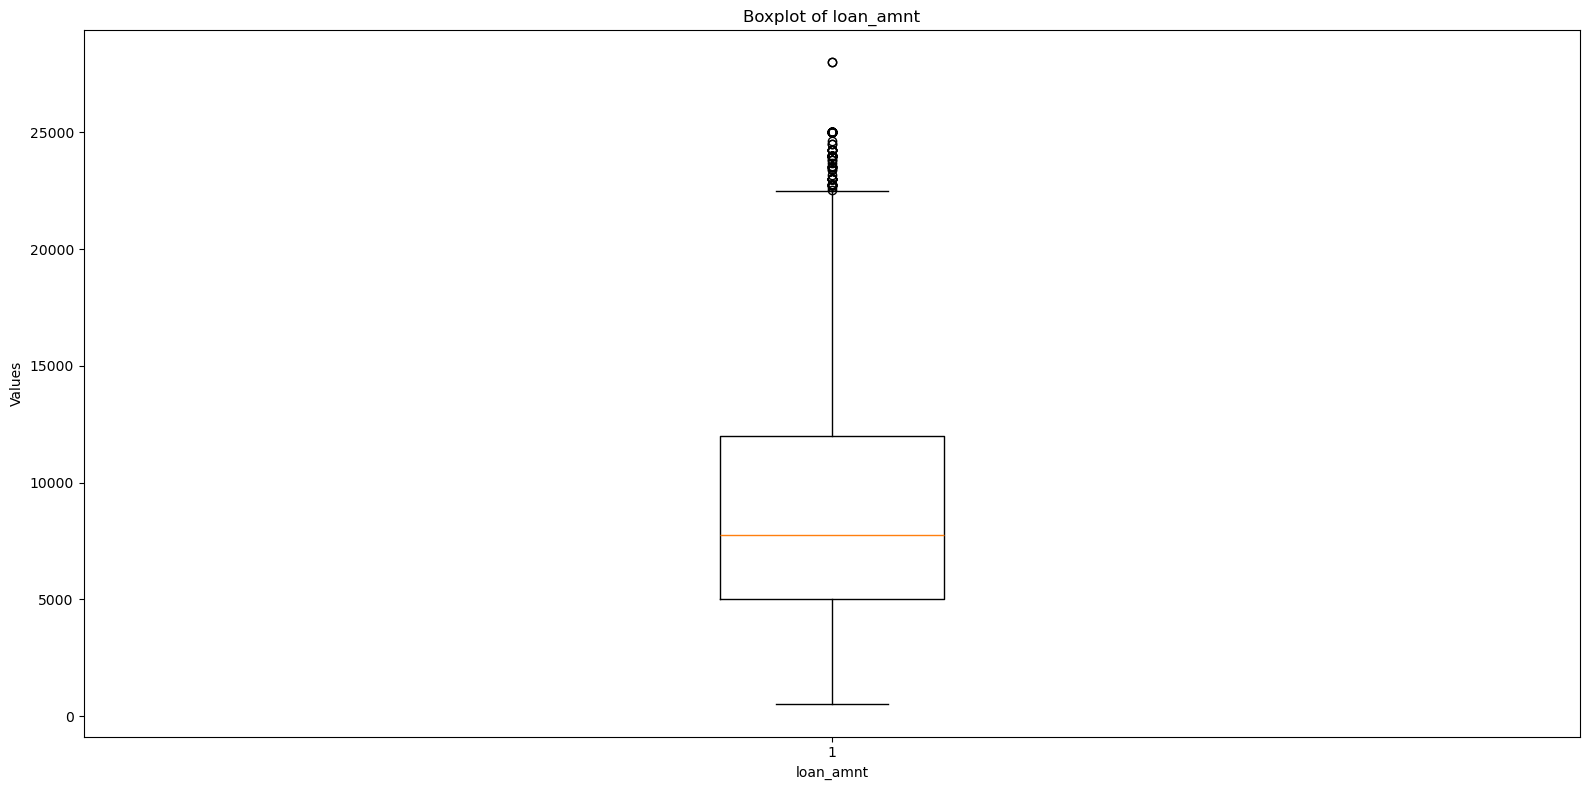

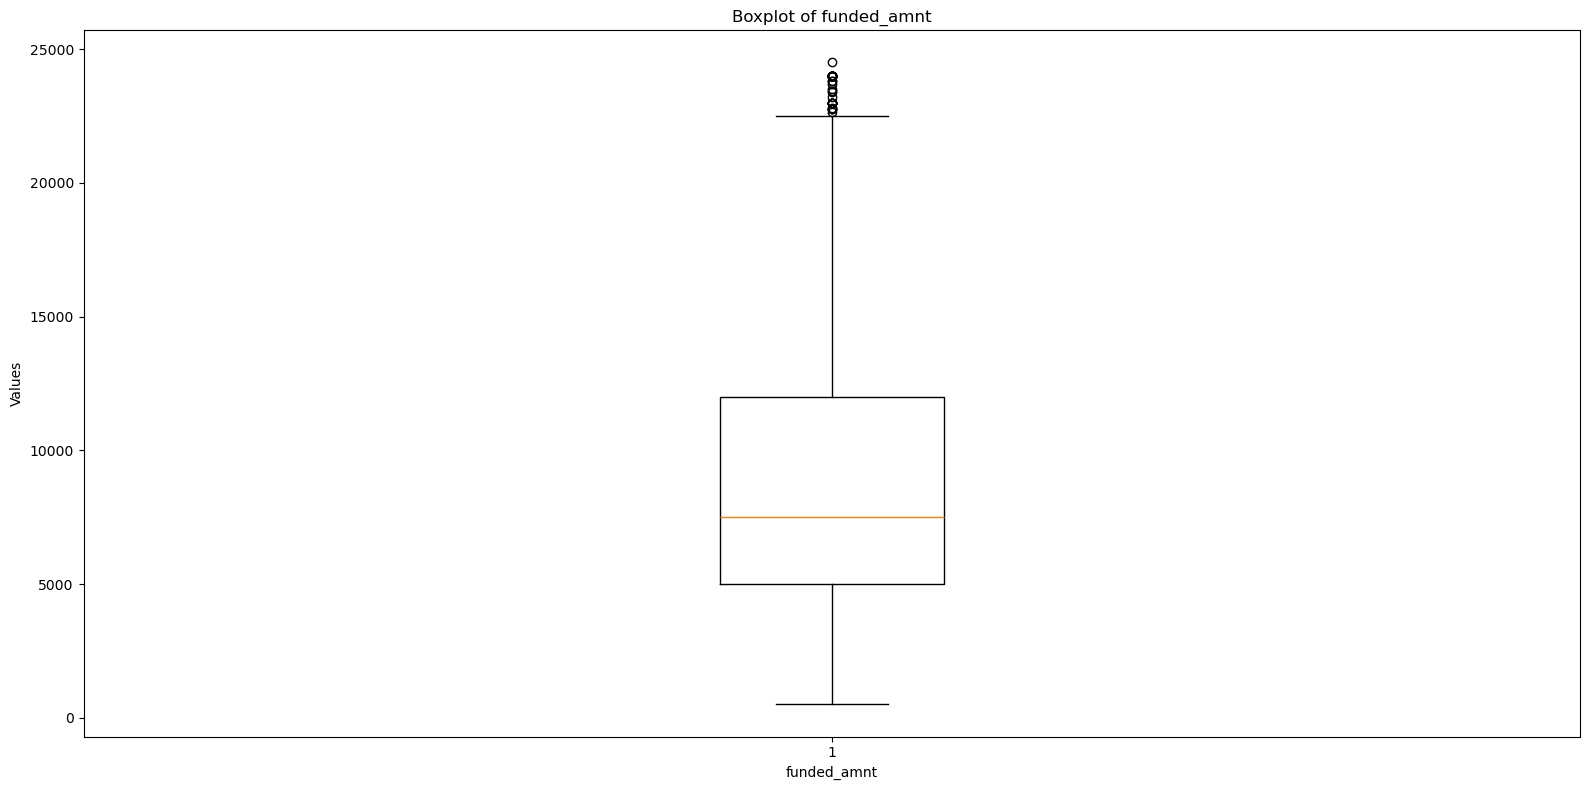

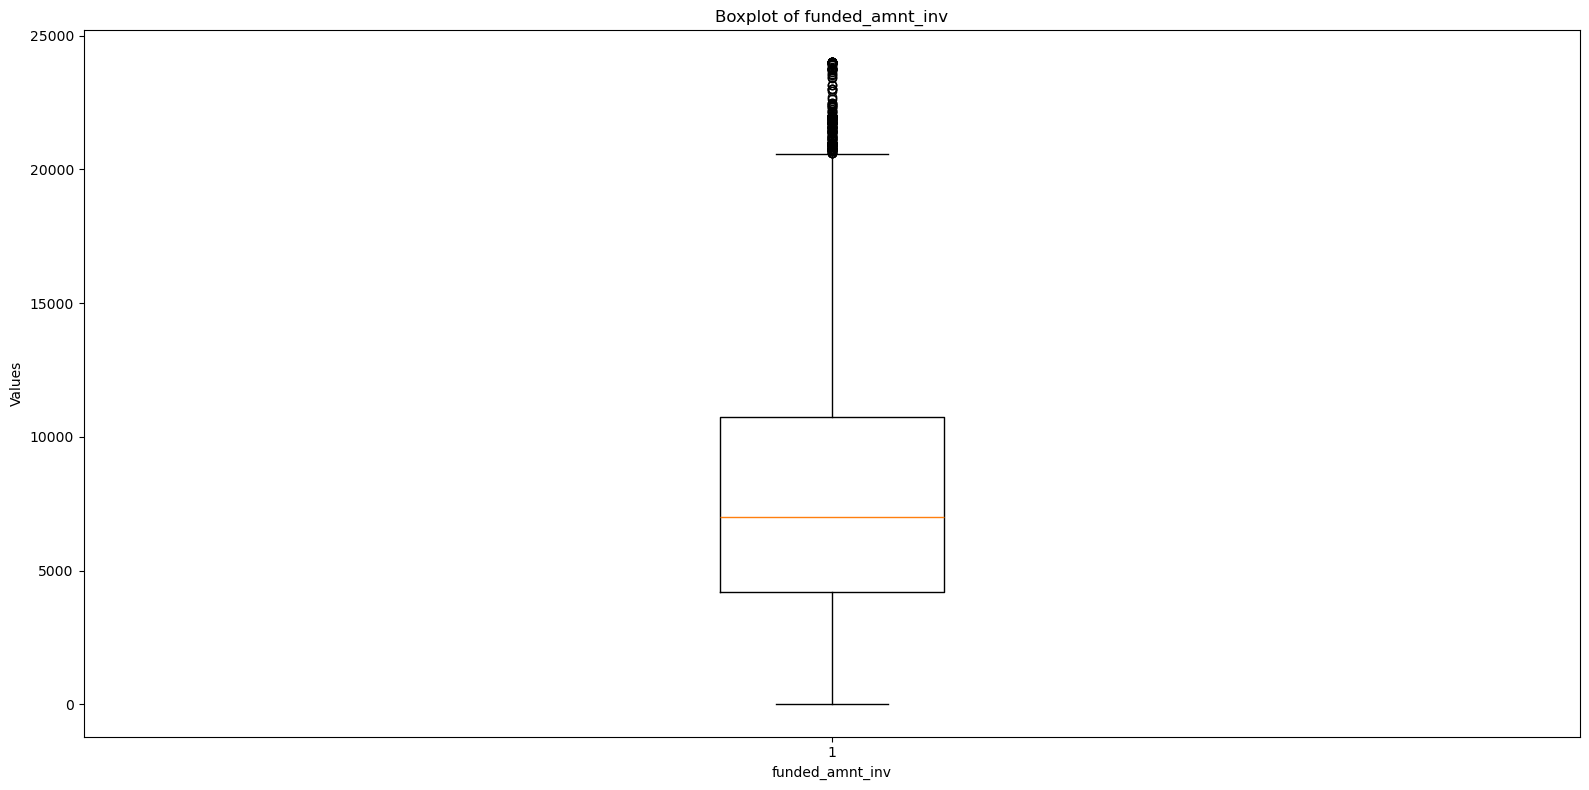

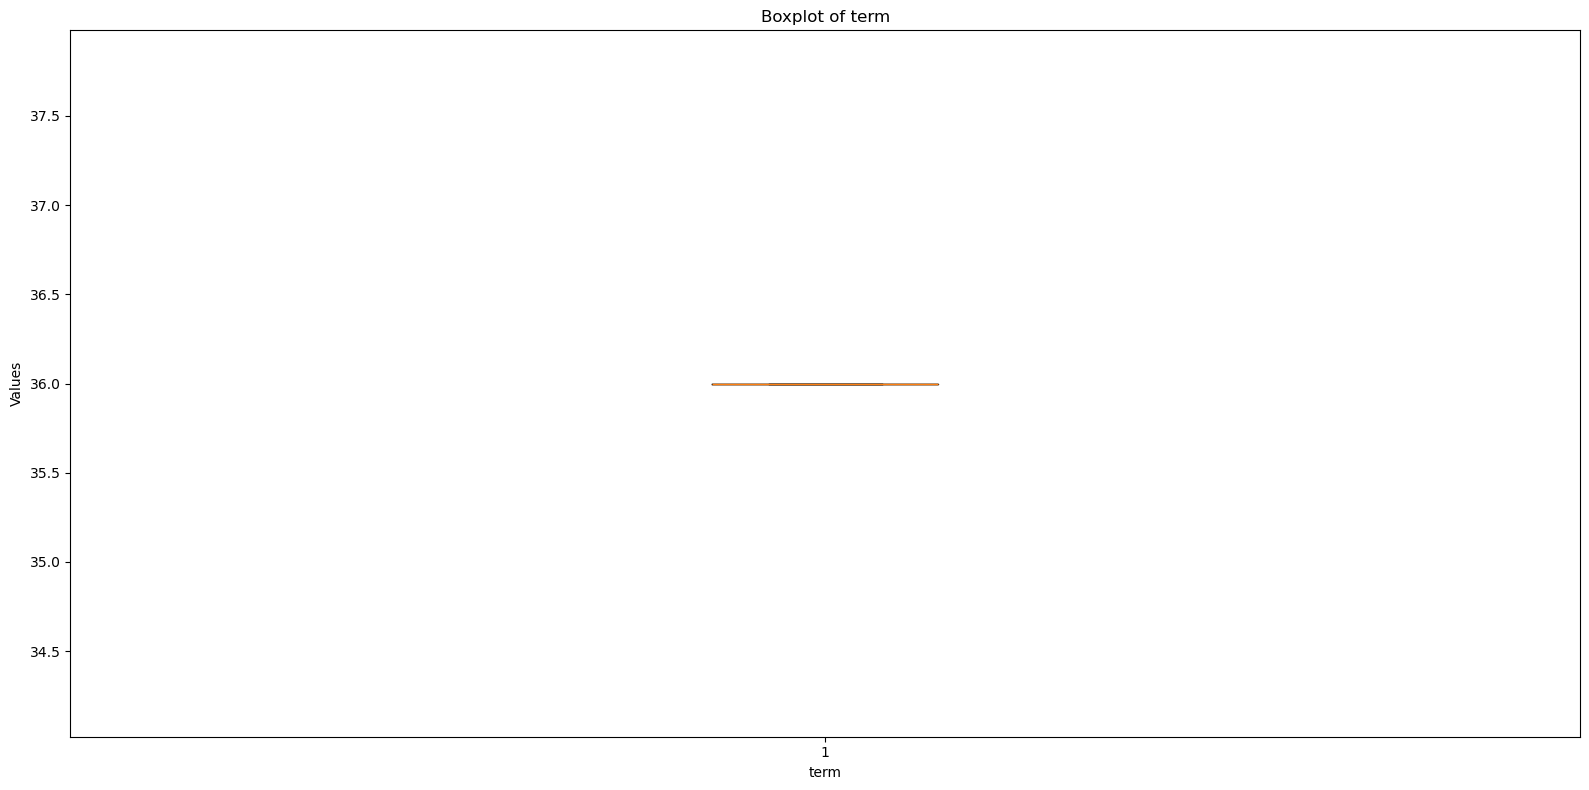

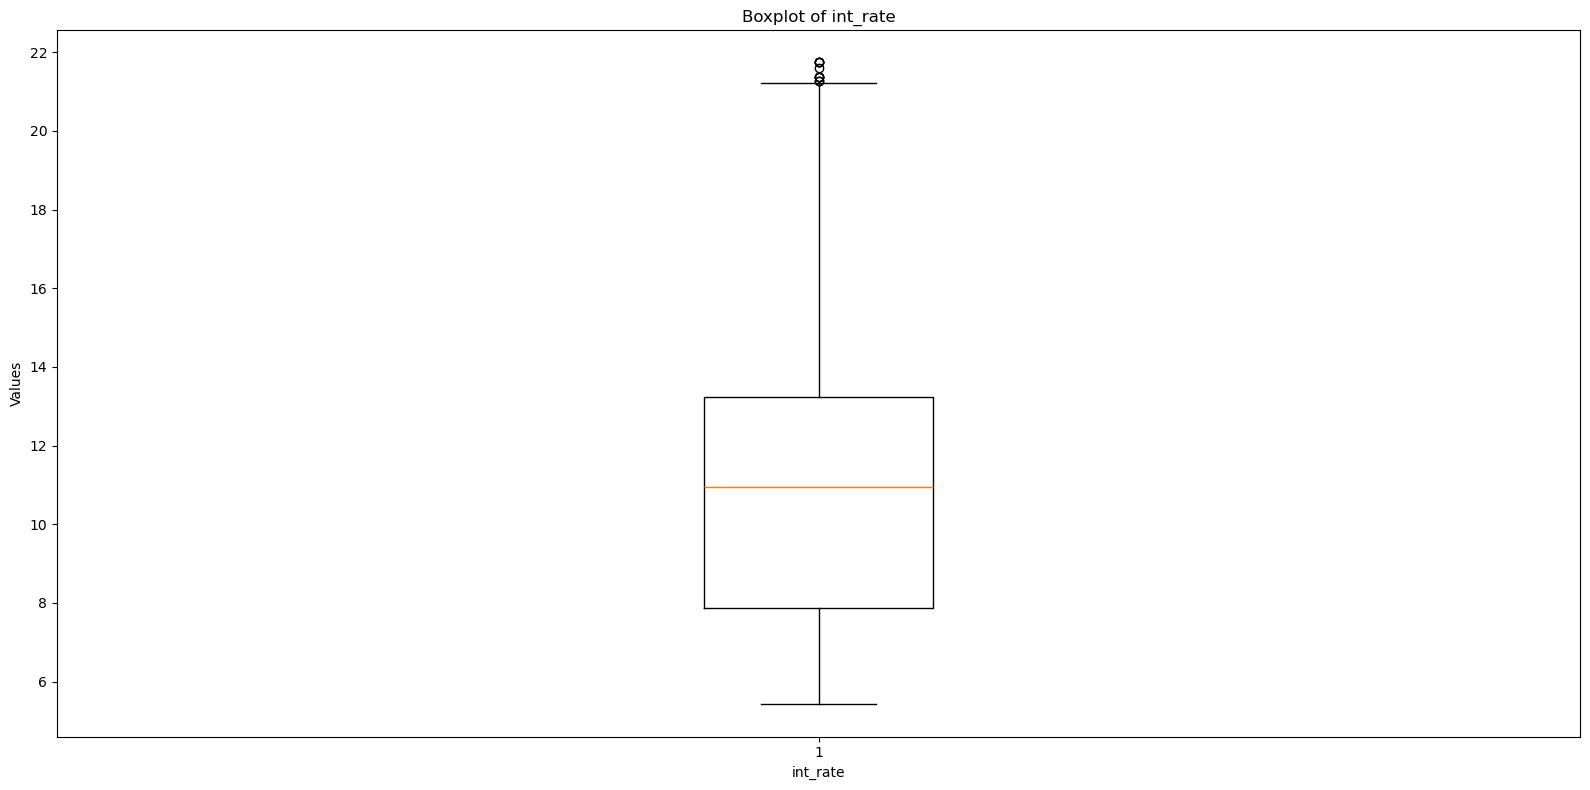

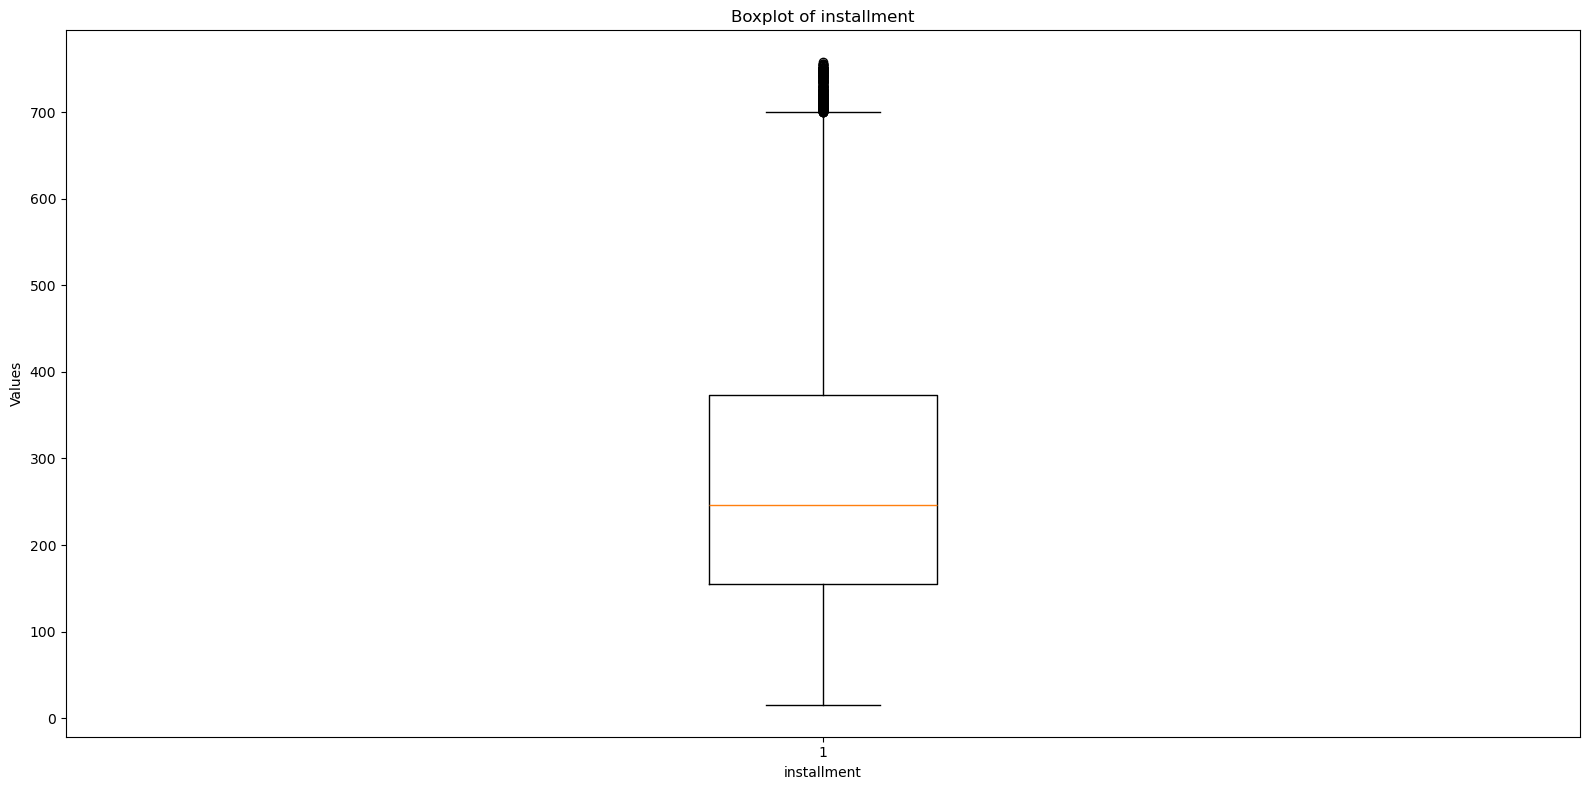

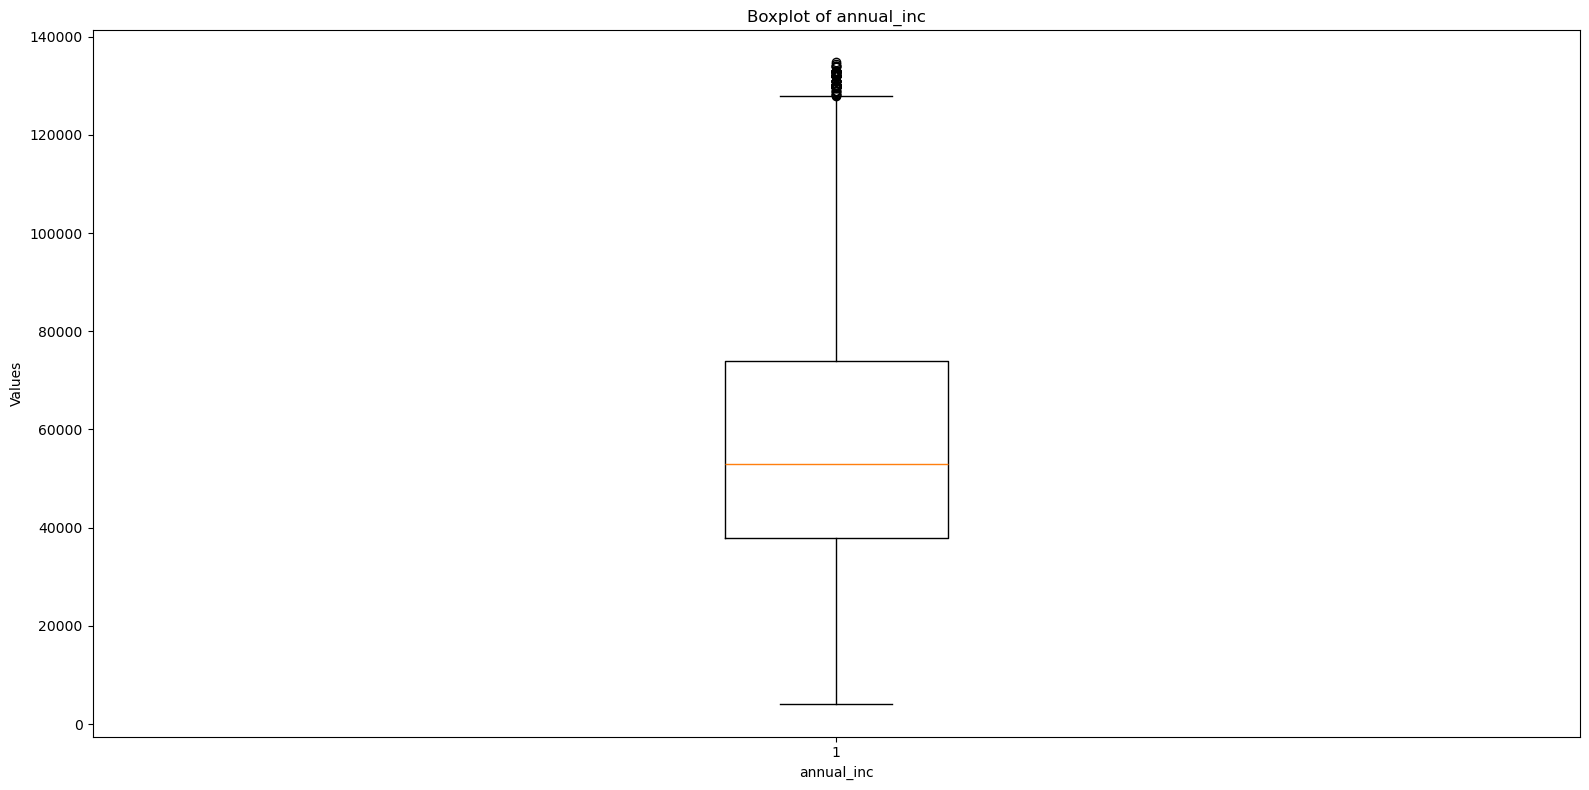

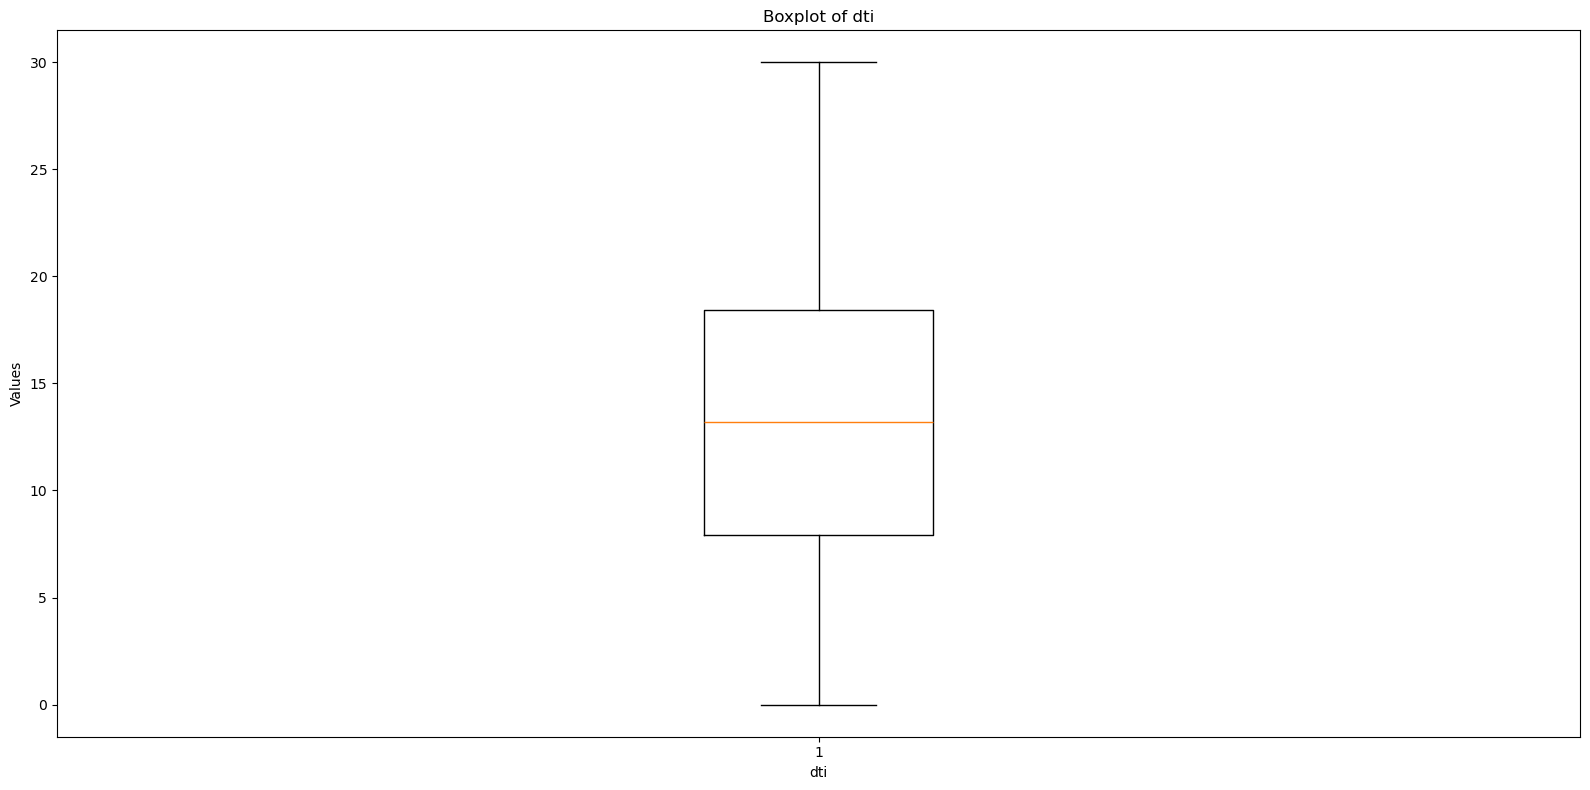

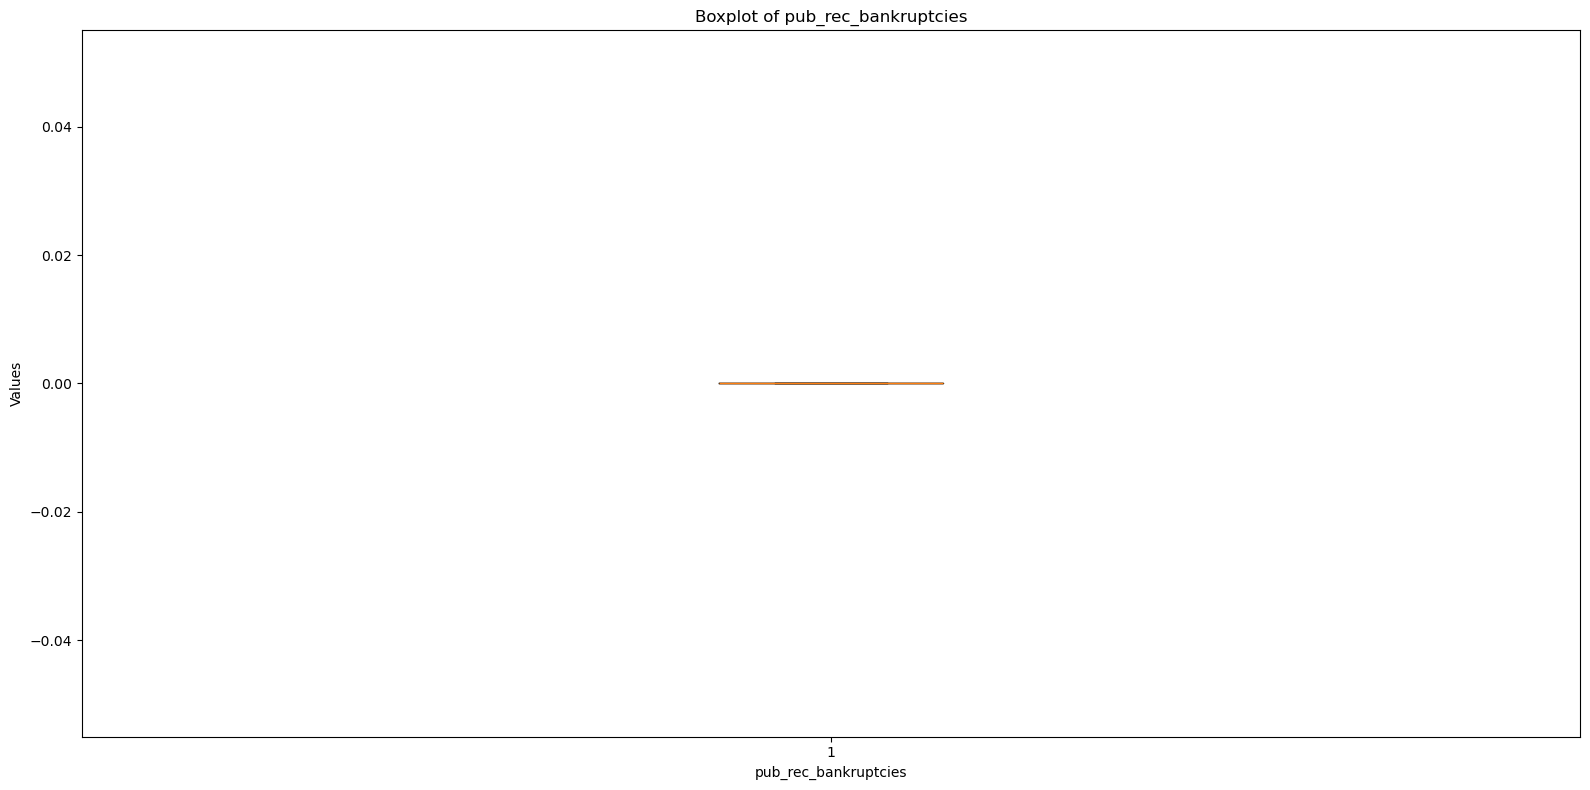

In [59]:
for i in numeric_cols:
    plt.figure(figsize=(16, 8))  # Adjust width and height as needed
    plt.boxplot(loan_data_clean[i])
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.tight_layout()  # Ensures everything fits nicely
    plt.show()

In [60]:
loan_data_clean.dtypes

loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

## Plotting the bar graphs for the categorical columns

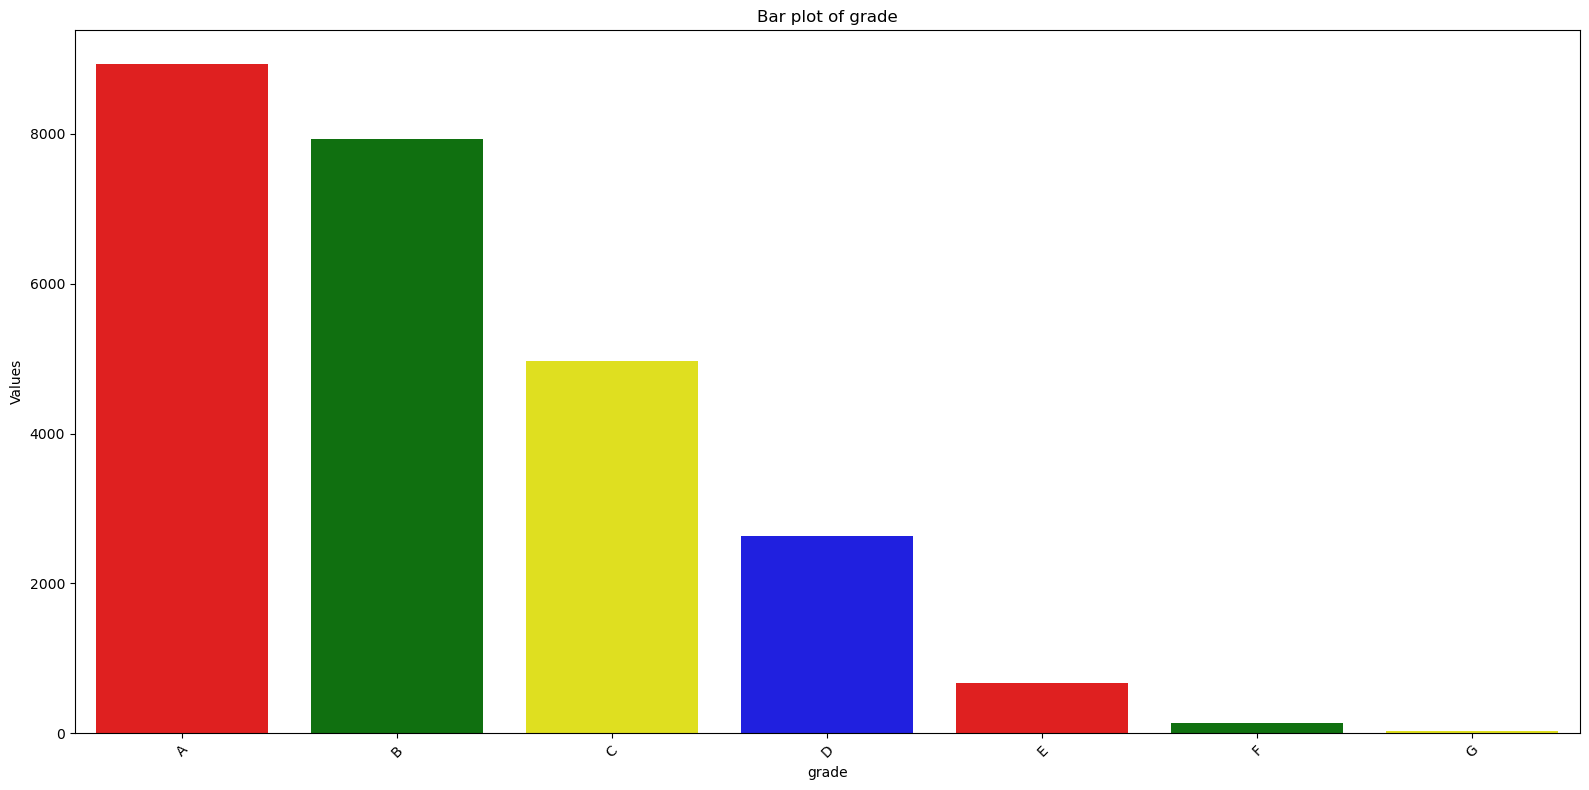

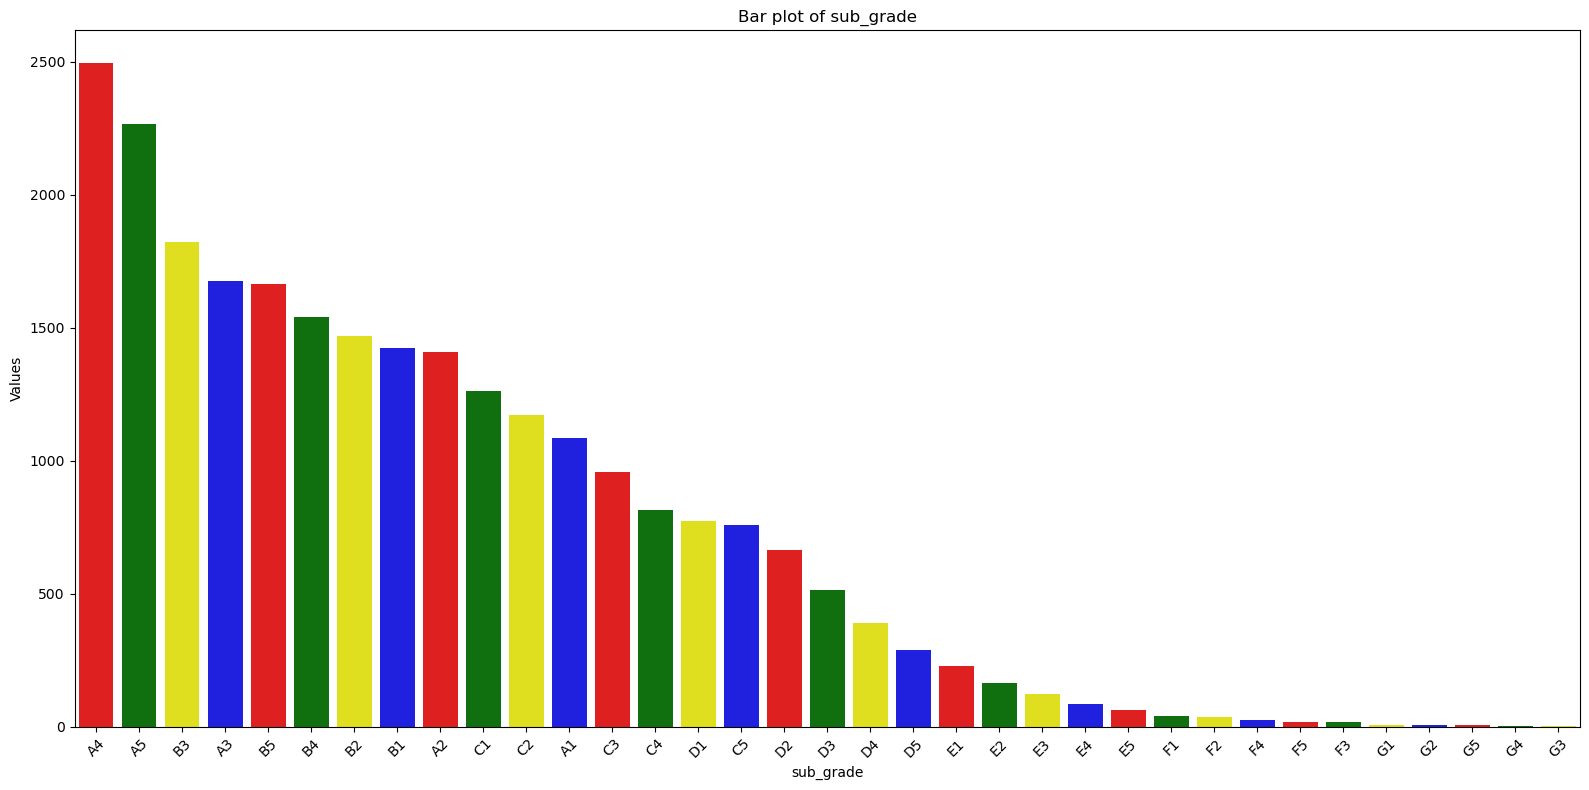

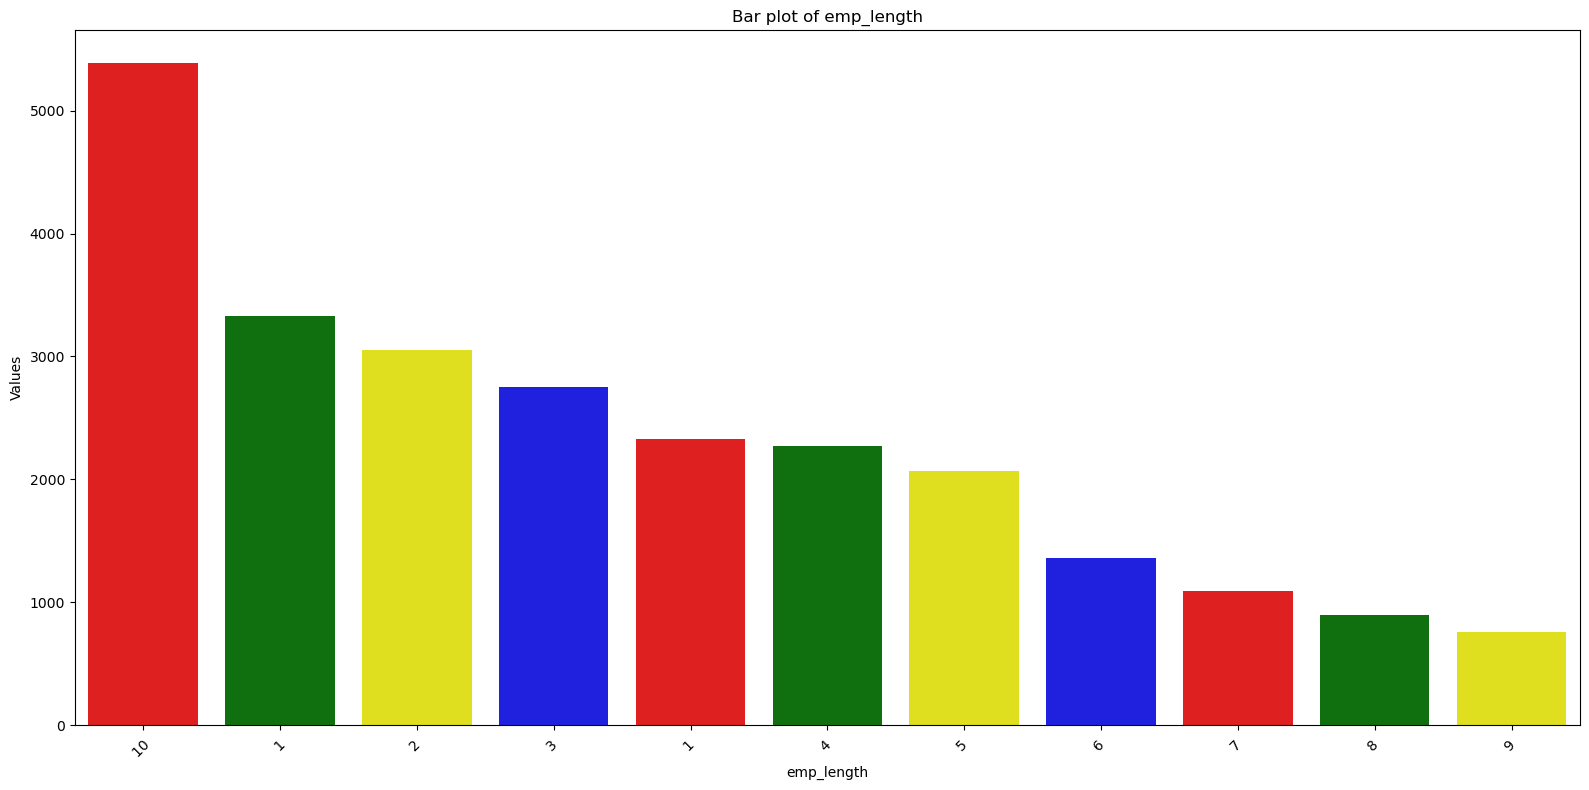

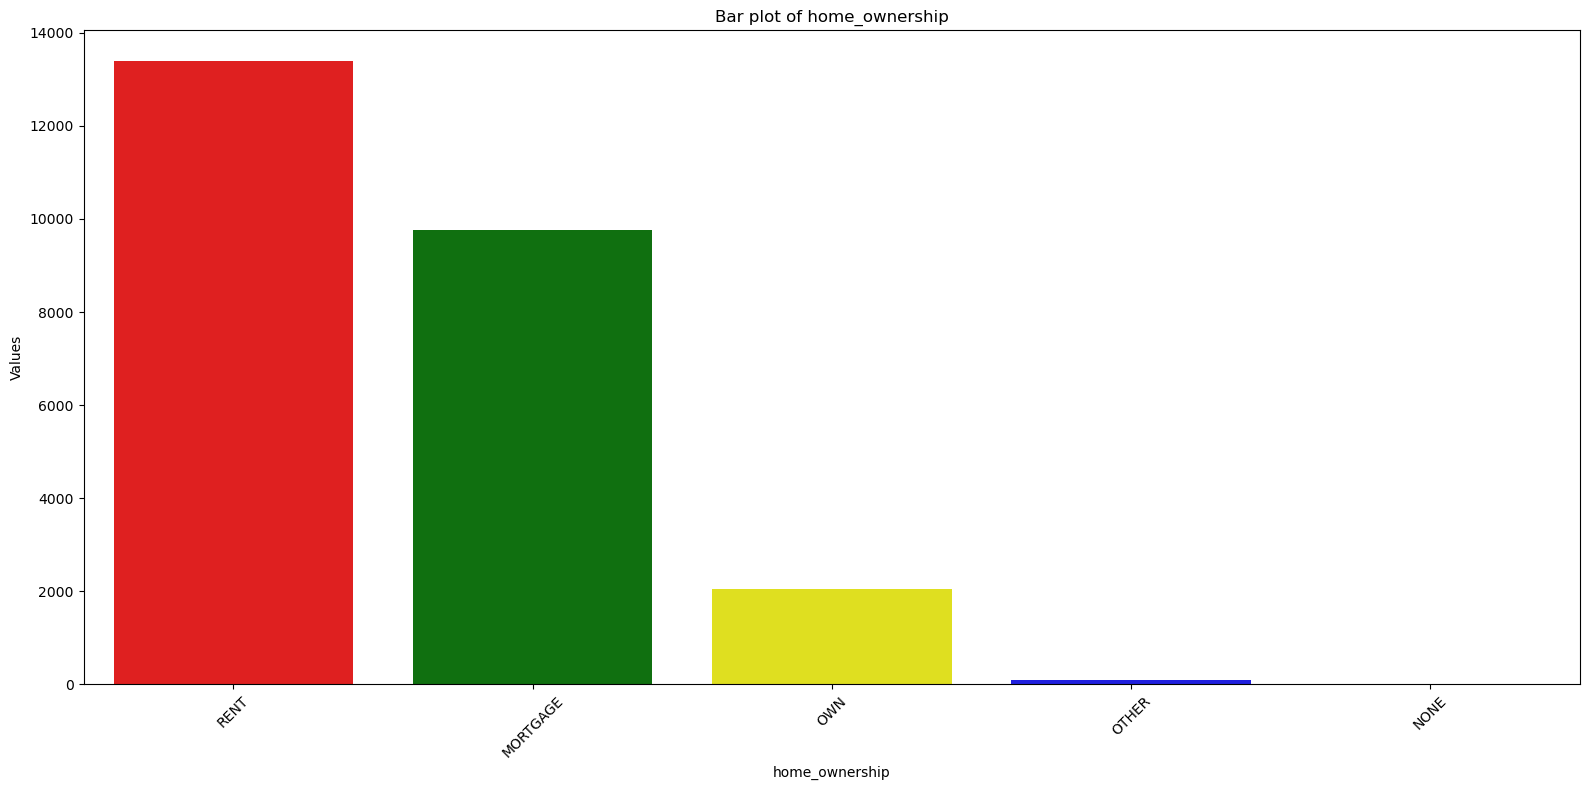

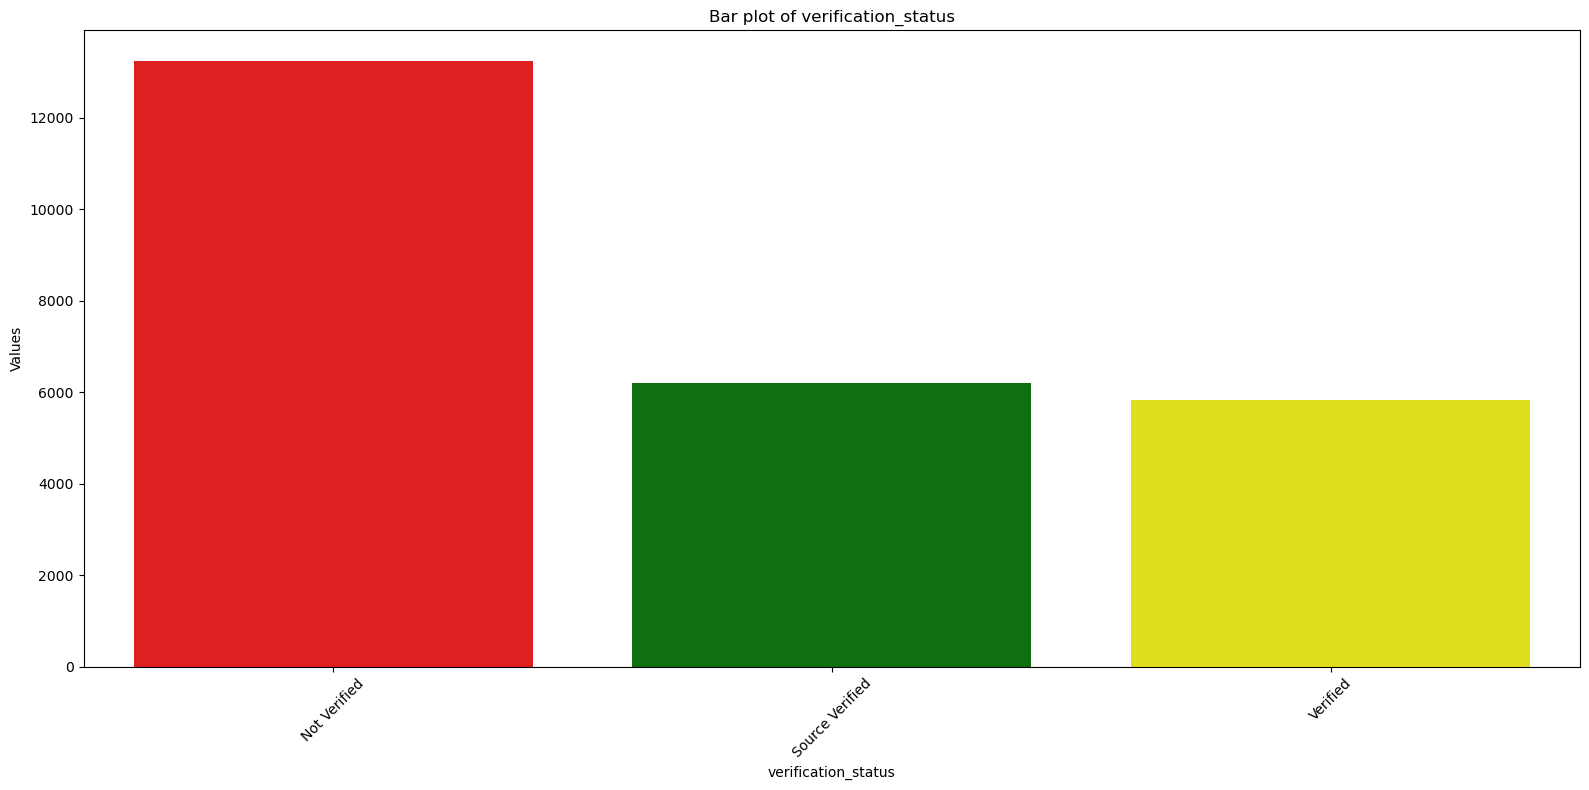

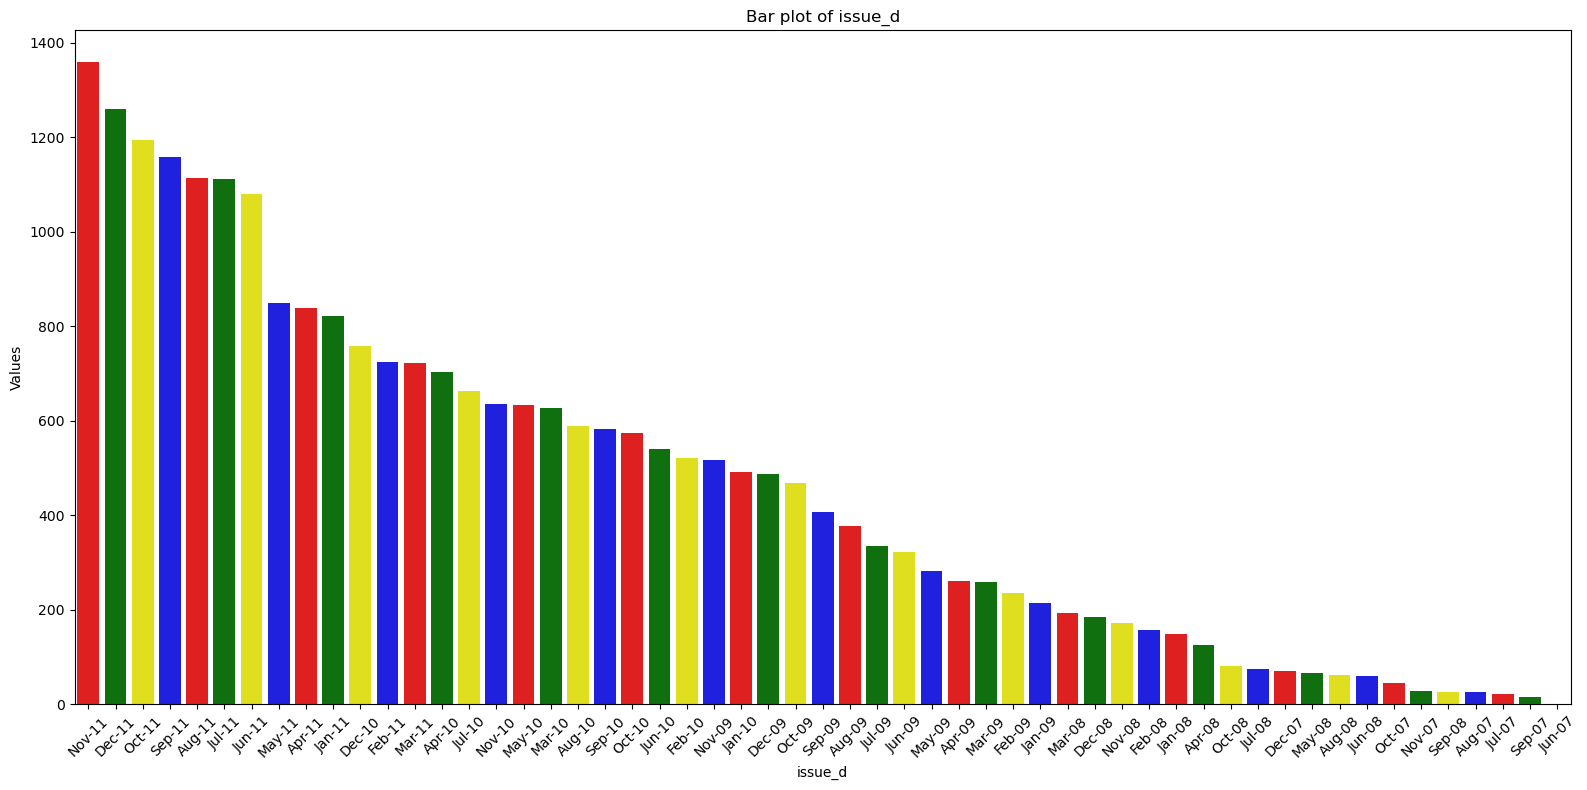

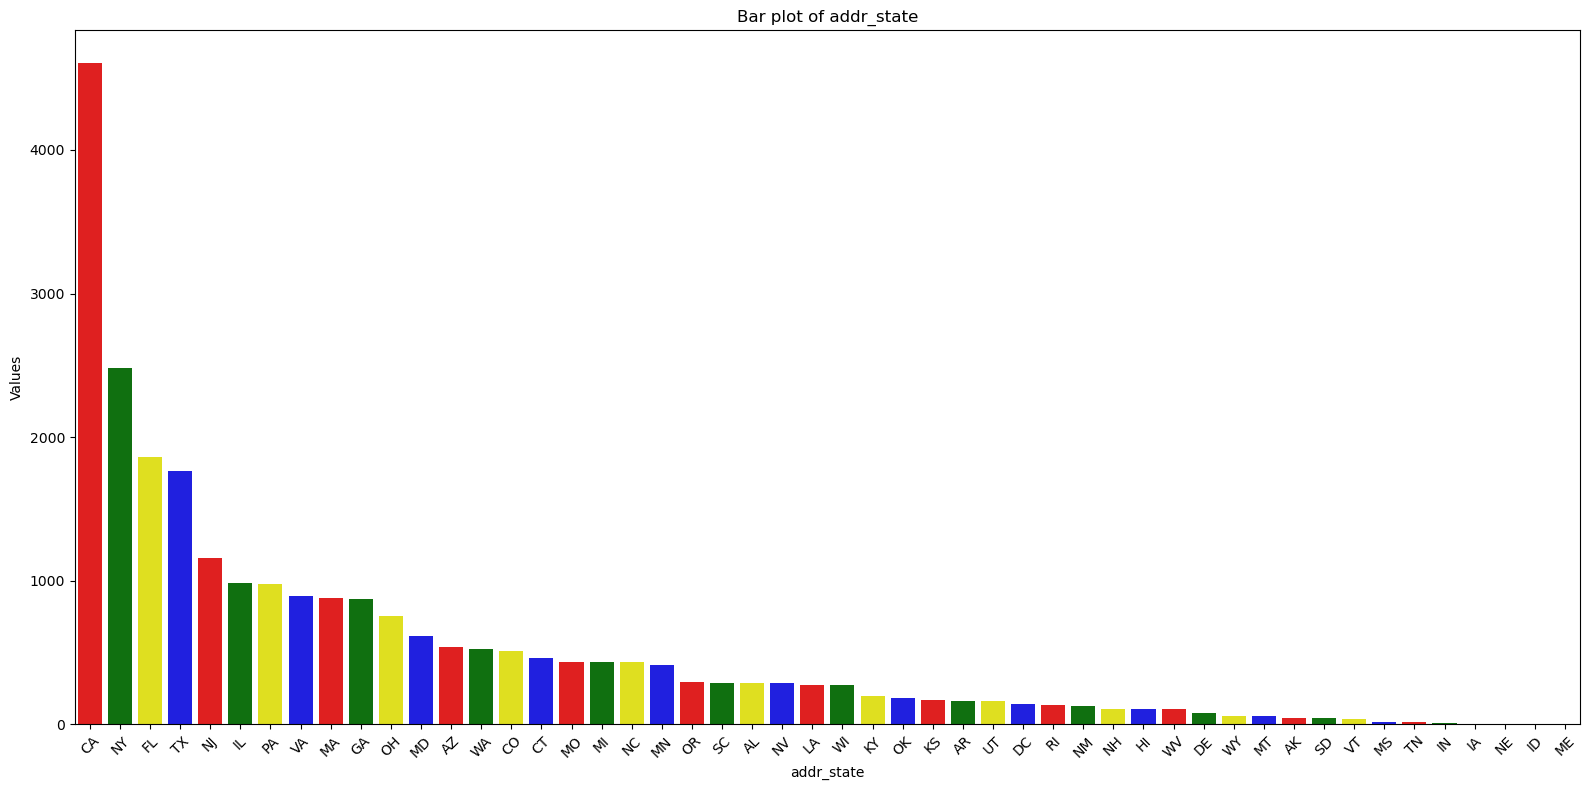

In [62]:
categorical_cols=loan_data_clean.select_dtypes(include=["object"]).columns

color_palette = ["red", "green", "yellow", "blue"]  # Define your colors

for i in categorical_cols:
    plt.figure(figsize=(16, 8))  # Adjust width and height as needed

    # Use Seaborn's color palette for better control
    sns.barplot(x=loan_data_clean[i].value_counts().index, 
                y=loan_data_clean[i].value_counts().values,
                palette=color_palette)
    
    plt.title(f'Bar plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
    plt.tight_layout()
    plt.show()

## Generate pie charts for each categorical column

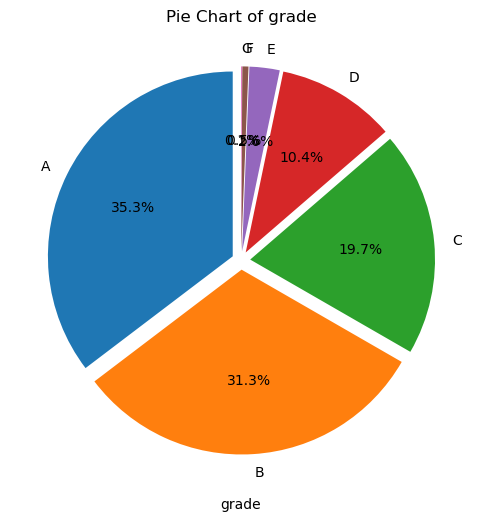

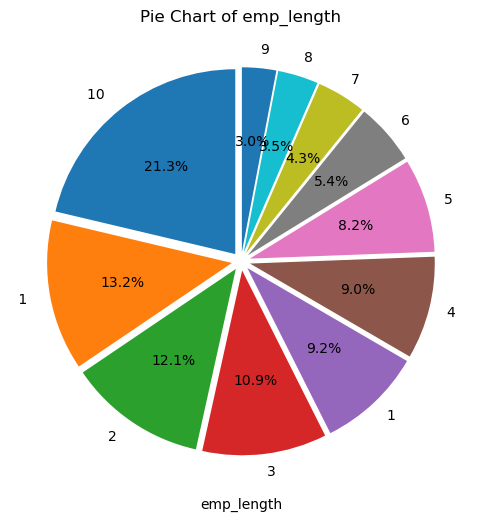

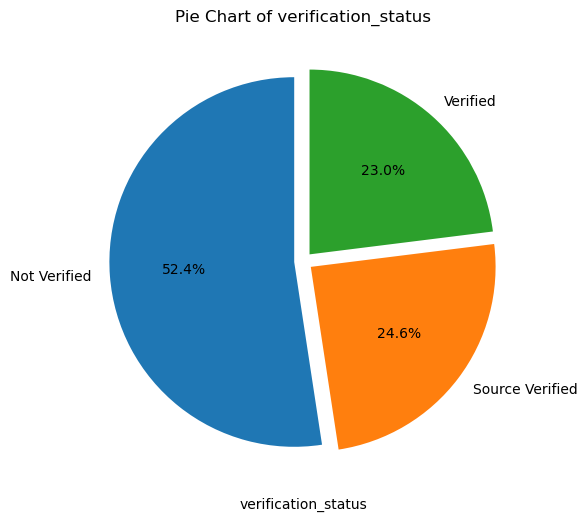

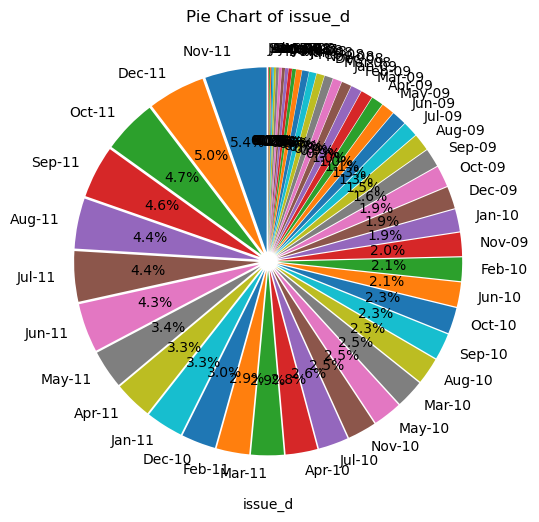

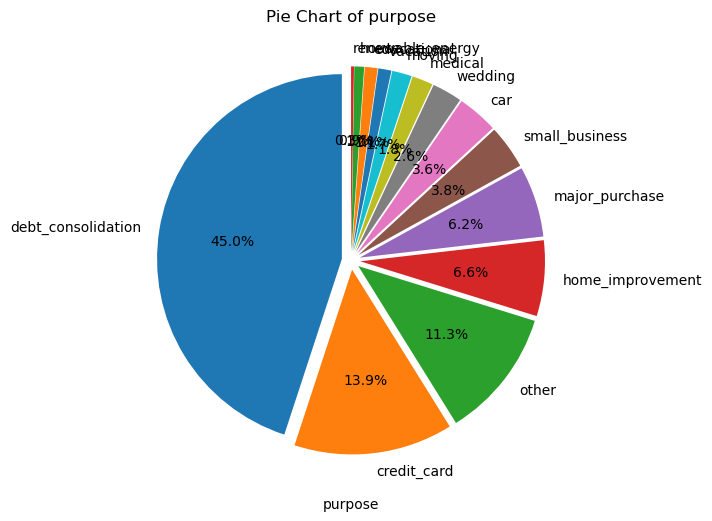

In [64]:
categorical_cols=loan_data_clean.select_dtypes(include=["object"]).columns

# Define figure size and label dictionary outside the loop
figsize = (8, 6)  # You can adjust this size as per your needs
labels_dict = {}

# Exclude 'zip_code' and 'addr_state' from the list of categorical columns
excluded_columns = ['zip_code', 'addr_state']
categorical_cols_filtered = [col for col in categorical_cols if col not in excluded_columns]

# Loop through each categorical_cols_filtered
for i in categorical_cols_filtered:
    # Get the value counts for the column
    value_counts = loan_data_clean[i].value_counts()
    
    # Create labels from the index of value counts
    labels_dict[i] = value_counts.index
    
    # Plot the pie chart
    plt.figure(figsize=figsize)
    value_counts.plot(kind="pie", labels=labels_dict[i], autopct='%1.1f%%', startangle=90, 
                      explode=[0.05]*len(value_counts))
    
    # Set title and labels
    plt.title(f'Pie Chart of {i}')
    plt.ylabel('')
    plt.xlabel(i)

    # Display the chart
    plt.show()


## Observations

### 1. Most of the loan applications are from CA state.
### 2. Most cases the purpose of loan is for devt_consolidation.
### 3. Most of the applications are having 10+ yrs of Exp.
### 4. Most of loan applicants are either living on Rent or on Mortgage.
### 5. Majority of the customers are from grade B.
### 6. Avg interest rate falls near to 11.3%.
### 7. Majority of the customers are not verified.
### 8. Majority of the customers has paid the loan.
### 9. Avg annual income of the customer falls in between 40000 and 60000.

# 4. Bi-Variate Analysis 

In [67]:
loan_data_clean.dtypes

loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

## Numeric vs Categorical Boxplot

In [69]:
# annual_inc vs loan_status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data_clean,color= 'yellow')
plt.title('Loan status  by Annual Income')
plt.xlabel('LoanStatus')
plt.ylabel('Annual Income')
plt.show()

### Observations
#### 1. Avg annual income of the fully paid and charged off customers are almost same
#### 2. Annual income less than 40000 has high chance of charged off

## Interest rate vs Loan status

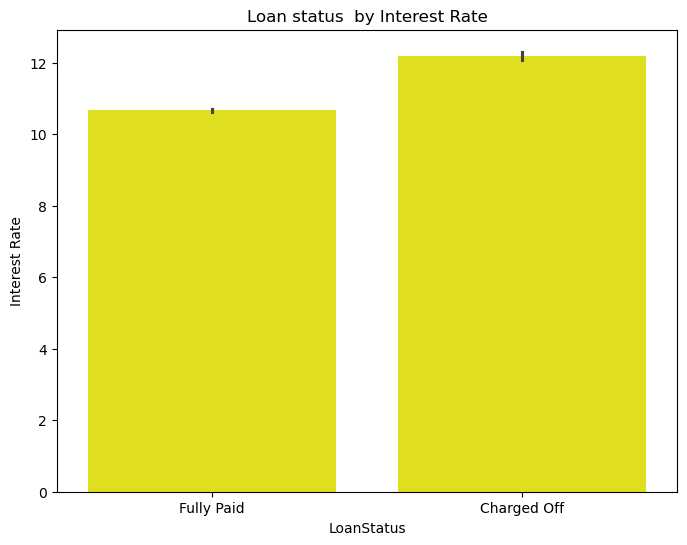

In [72]:
plt.figure(figsize=(8, 6))
sns.barplot(x='loan_status', y='int_rate', data=loan_data_clean ,color= 'yellow')
plt.title('Loan status  by Interest Rate')
plt.xlabel('LoanStatus')
plt.ylabel('Interest Rate')
plt.show()

### Observations
#### 1.Interest rate more than 10 % is high chances of charged off.
#### 2.Interest rate less than 10 % is high chances of fully paid.

## Interest rate vs grade

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='grade', y='int_rate', data=loan_data_clean ,color= 'yellow')
plt.title('grade  by Interest Rate')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

### Observations
#### 1. The Avg interest for the Grade A is smaller compared to the rest of the grades 
#### 2. The Avg interest for the grade G is higher compared to the rest of the grades

## Installment vs int rate (Numeric vs Numeric)

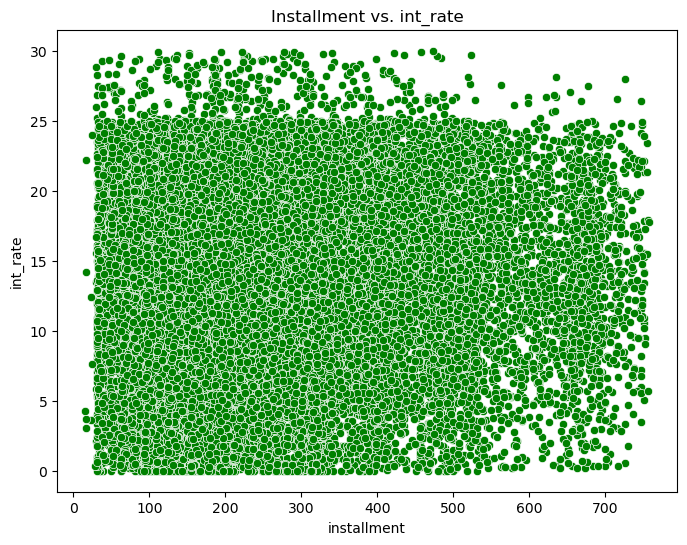

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='installment', y='dti', data=loan_data_clean, color='green')
plt.title('Installment vs. int_rate')
plt.xlabel('installment')
plt.ylabel('int_rate')
plt.show()

### Observations

#### There's a clear positive correlation between installment and int_rate. This means that as the installment amount increases, the interest rate also tends to increase. This is somewhat expected, as higher interest rates generally lead to higher monthly payments.
#### Specific Observations:

##### 1. Wide range of values: Both installment and int_rate exhibit a wide range of values, suggesting a diverse set of loans in the dataset.
##### 2. Density: The plot is quite dense, indicating many data points. This might make it difficult to discern finer patterns.
##### 3. Potential outliers: There might be some outliers, especially for higher installment amounts and interest rates. It would be worth investigating these further.
##### 4. No clear clusters: There aren't any obvious distinct clusters in the data, suggesting that the relationship between installment and interest rate is fairly continuous.

## Home ownership vs loan status (Categorical vs Categorical)

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loan_data_clean, palette=['green', 'red'])
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

### Observations

#### 1. Renters Have Higher Default Rates: 
##### The RENT category also shows a substantial number of loans.However, the proportion of red ("Charged Off") bars is noticeably higher for RENT compared to MORTGAGE. This suggests that renters are more likely to default on their loans than homeowners.

#### 2. Mortgage Holders Have the Highest Loan Counts and Best Performance:
##### The proportion of green ("Fully Paid") bars is significantly larger than the red ("Charged Off") bars for MORTGAGE, suggesting that mortgage holders have a better loan repayment track record compared to other categories.

#### 3. Other Categories Have Fewer Loans:
##### OWN, OTHER, and NONE have considerably fewer loans compared to MORTGAGE and RENT.It's difficult to draw definitive conclusions about these categories due to the smaller sample sizes, but they seem to have varying levels of default risk.



## Purpose and the loan status

In [84]:
plt.figure(figsize=(30, 6))
sns.countplot(x='purpose', hue='loan_status', data=loan_data_clean, palette=['green', 'red'])
plt.title('Loan Status by purpose')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.show()

### Observations

#### 1. Debt Consolidation Tops the List:
##### The debt_consolidation category has the highest number of loans, indicating it is probably one of the strongest motivations for taking loans.

#### 2. Charge-Offs Are Also Very High in Debt Consolidation:
##### Even though the debt_consolidation category can top the list with the most loans, it also bears a sizeable amount of charged-off loans (red bars). It indicates that those taking loans for consolidation are at higher risks of charge-off.

#### 3. Other Purposes Have Lower Volumes:
##### All other loan types, except for debt_consolidation, have far fewer observations.

#### 4. Charge-Off Rates by Loan Purpose:
##### credit_card is the next most prominent loan type with a large number of loans and many charge-offs observable.home_improvement, major_purchase also have a respectable number of loans with lots of charge-offs.Loans with categories such as renewable_energy, vacation, wedding, etc. have few loans and thus cannot have their risk profile set up considerably.

## Verification status and the loan status

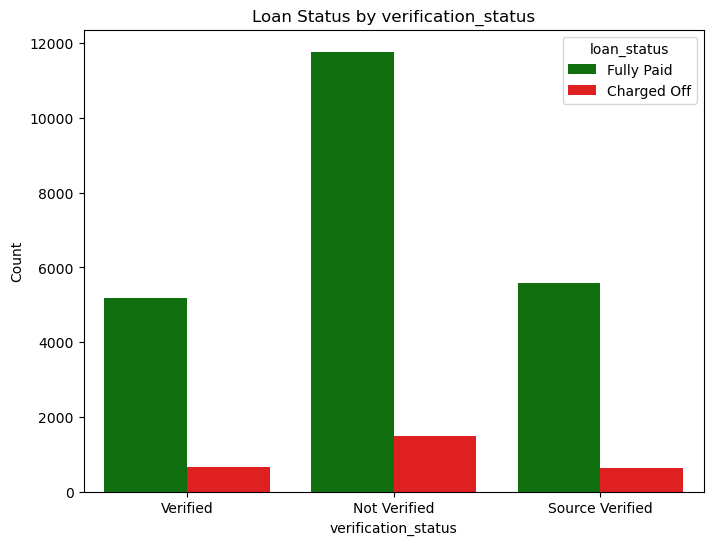

In [87]:
plt.figure(figsize=(8, 6))
sns.countplot(x='verification_status', hue='loan_status', data=loan_data_clean, palette=['green', 'red'])
plt.title('Loan Status by verification_status')
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.show()

### Observations
#### 1. Verification Status Impacts Loan Performance
##### Verified loans perform best: The graph clearly shows that loans for which borrower's income and employment have been verified ('Verified' status) have the highest proportion of 'Fully Paid' loans (green bars) as well as the lowest proportion of 'Charged Off' loans (red bars).

##### Not Verified loans are the riskiest: Not verified status loans, in which a lender never verifies the borrower's information, have incurred the highest number of 'Charged Off' loans. Such loans carry a much greater risk of default.

##### Source Verified falls in the middle: In loans whose information has been sourced but not wholly verified ('Source Verified' status), the performance falls somewhere in between. A 'Source Verified' loan charges off more than a 'Verified' loan but less than a 'Not Verified' loan.

#### 2. Majority of Loans are Either Verified or Source Verified

##### This plot also indicates that most loans in the dataset were 'Verified' and 'Source Verified', and 'Not Verified' are more low frequency loans.

#### Possible Explanations and Insights
##### 1. Verification and Risk Assessment: This clearly differentiated loan performance via verification status calls attention to the role of verification of the borrower's data during underwriting. This helps the lender to assess the credibility of a borrower better and, therefore, default risk also goes down.

##### 2. Risk-Based Pricing: The lender could use these facts as a basis for modifying the interest rate according to the verification status of the loan, capturing the difference amounts of risk each classification possess.

##### 3.Borrower Behaviour: The higher defaults found in the 'Not Verified' loan class might indicate that not-verified borrowers are more likely to experience financial problems, or are less credit worthy.




## State vs loan status

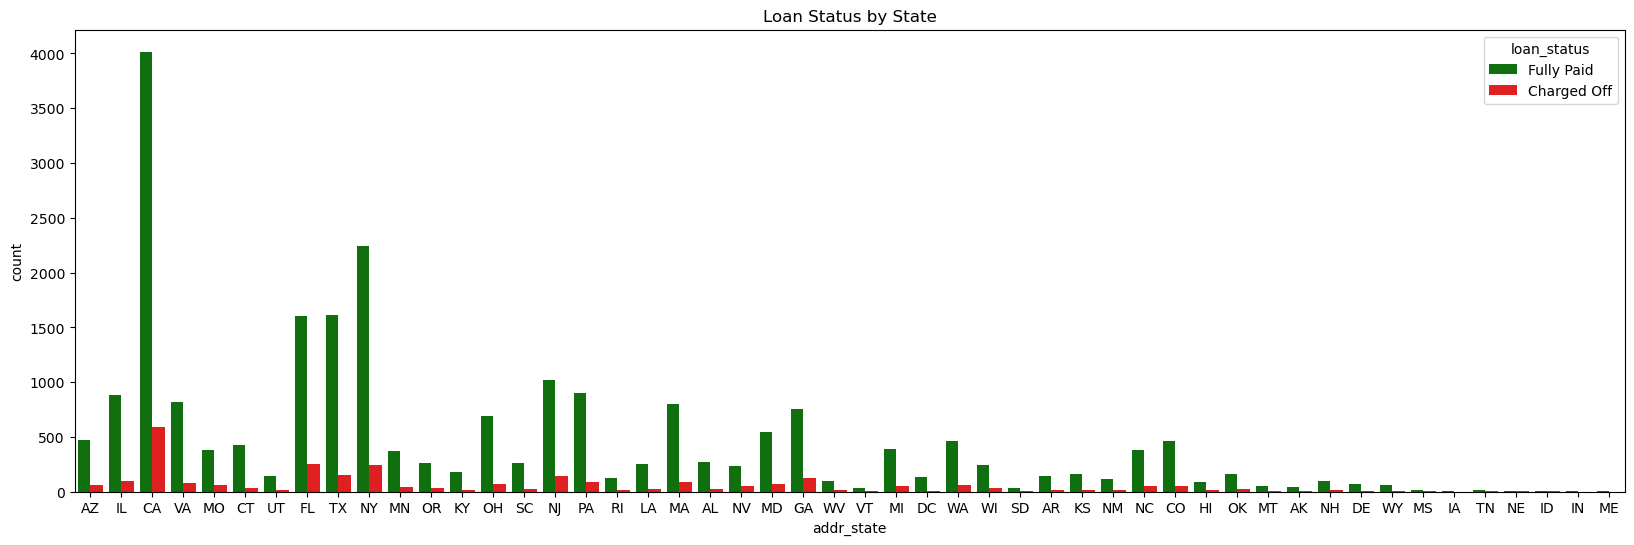

In [90]:
plt.figure(figsize=(20, 6))
sns.countplot(x='addr_state', hue='loan_status', data=loan_data_clean, palette=['green', 'red'])
plt.title('Loan Status by State')
plt.xlabel('addr_state')
plt.ylabel('count')
plt.show()

### Observations

#### Overall Loan Distribution:
##### 1. Total Loan Distribution:CA has a huge amount of loans and leads. Most outstanding loans came from California with an enormous difference of 13,978 loans, indicating higher concentration of borrowers or loan activity in that state.

##### 2. Volume of Loans across states is greatly distributed: Some states like CA, TX, NY, and FL have a lot of loans, whereas others like WY, VT, ND, and AK hardly have loans. This may again be due to the differences in populations, economic activities, or any other regional factor.

#### Charge-Off Rates :

##### 1.Most states have similar patterns: In general, most states have a higher percentage of "Fully Paid" loans (green bars) compared to "Charged Off" loans (red bars).

##### 2.Some of the states that had a relatively higher charge-off rate: Some states would have red bars taller than others with respect to green bars, and that may indicate a slightly higher loan default rate in such states. The sample size for every state should be taken into account. Smaller states with fewer loans tend to have more volatile charge-off rates. It could be explained by the smaller sample size.


# 5. Multi Variate Analysis

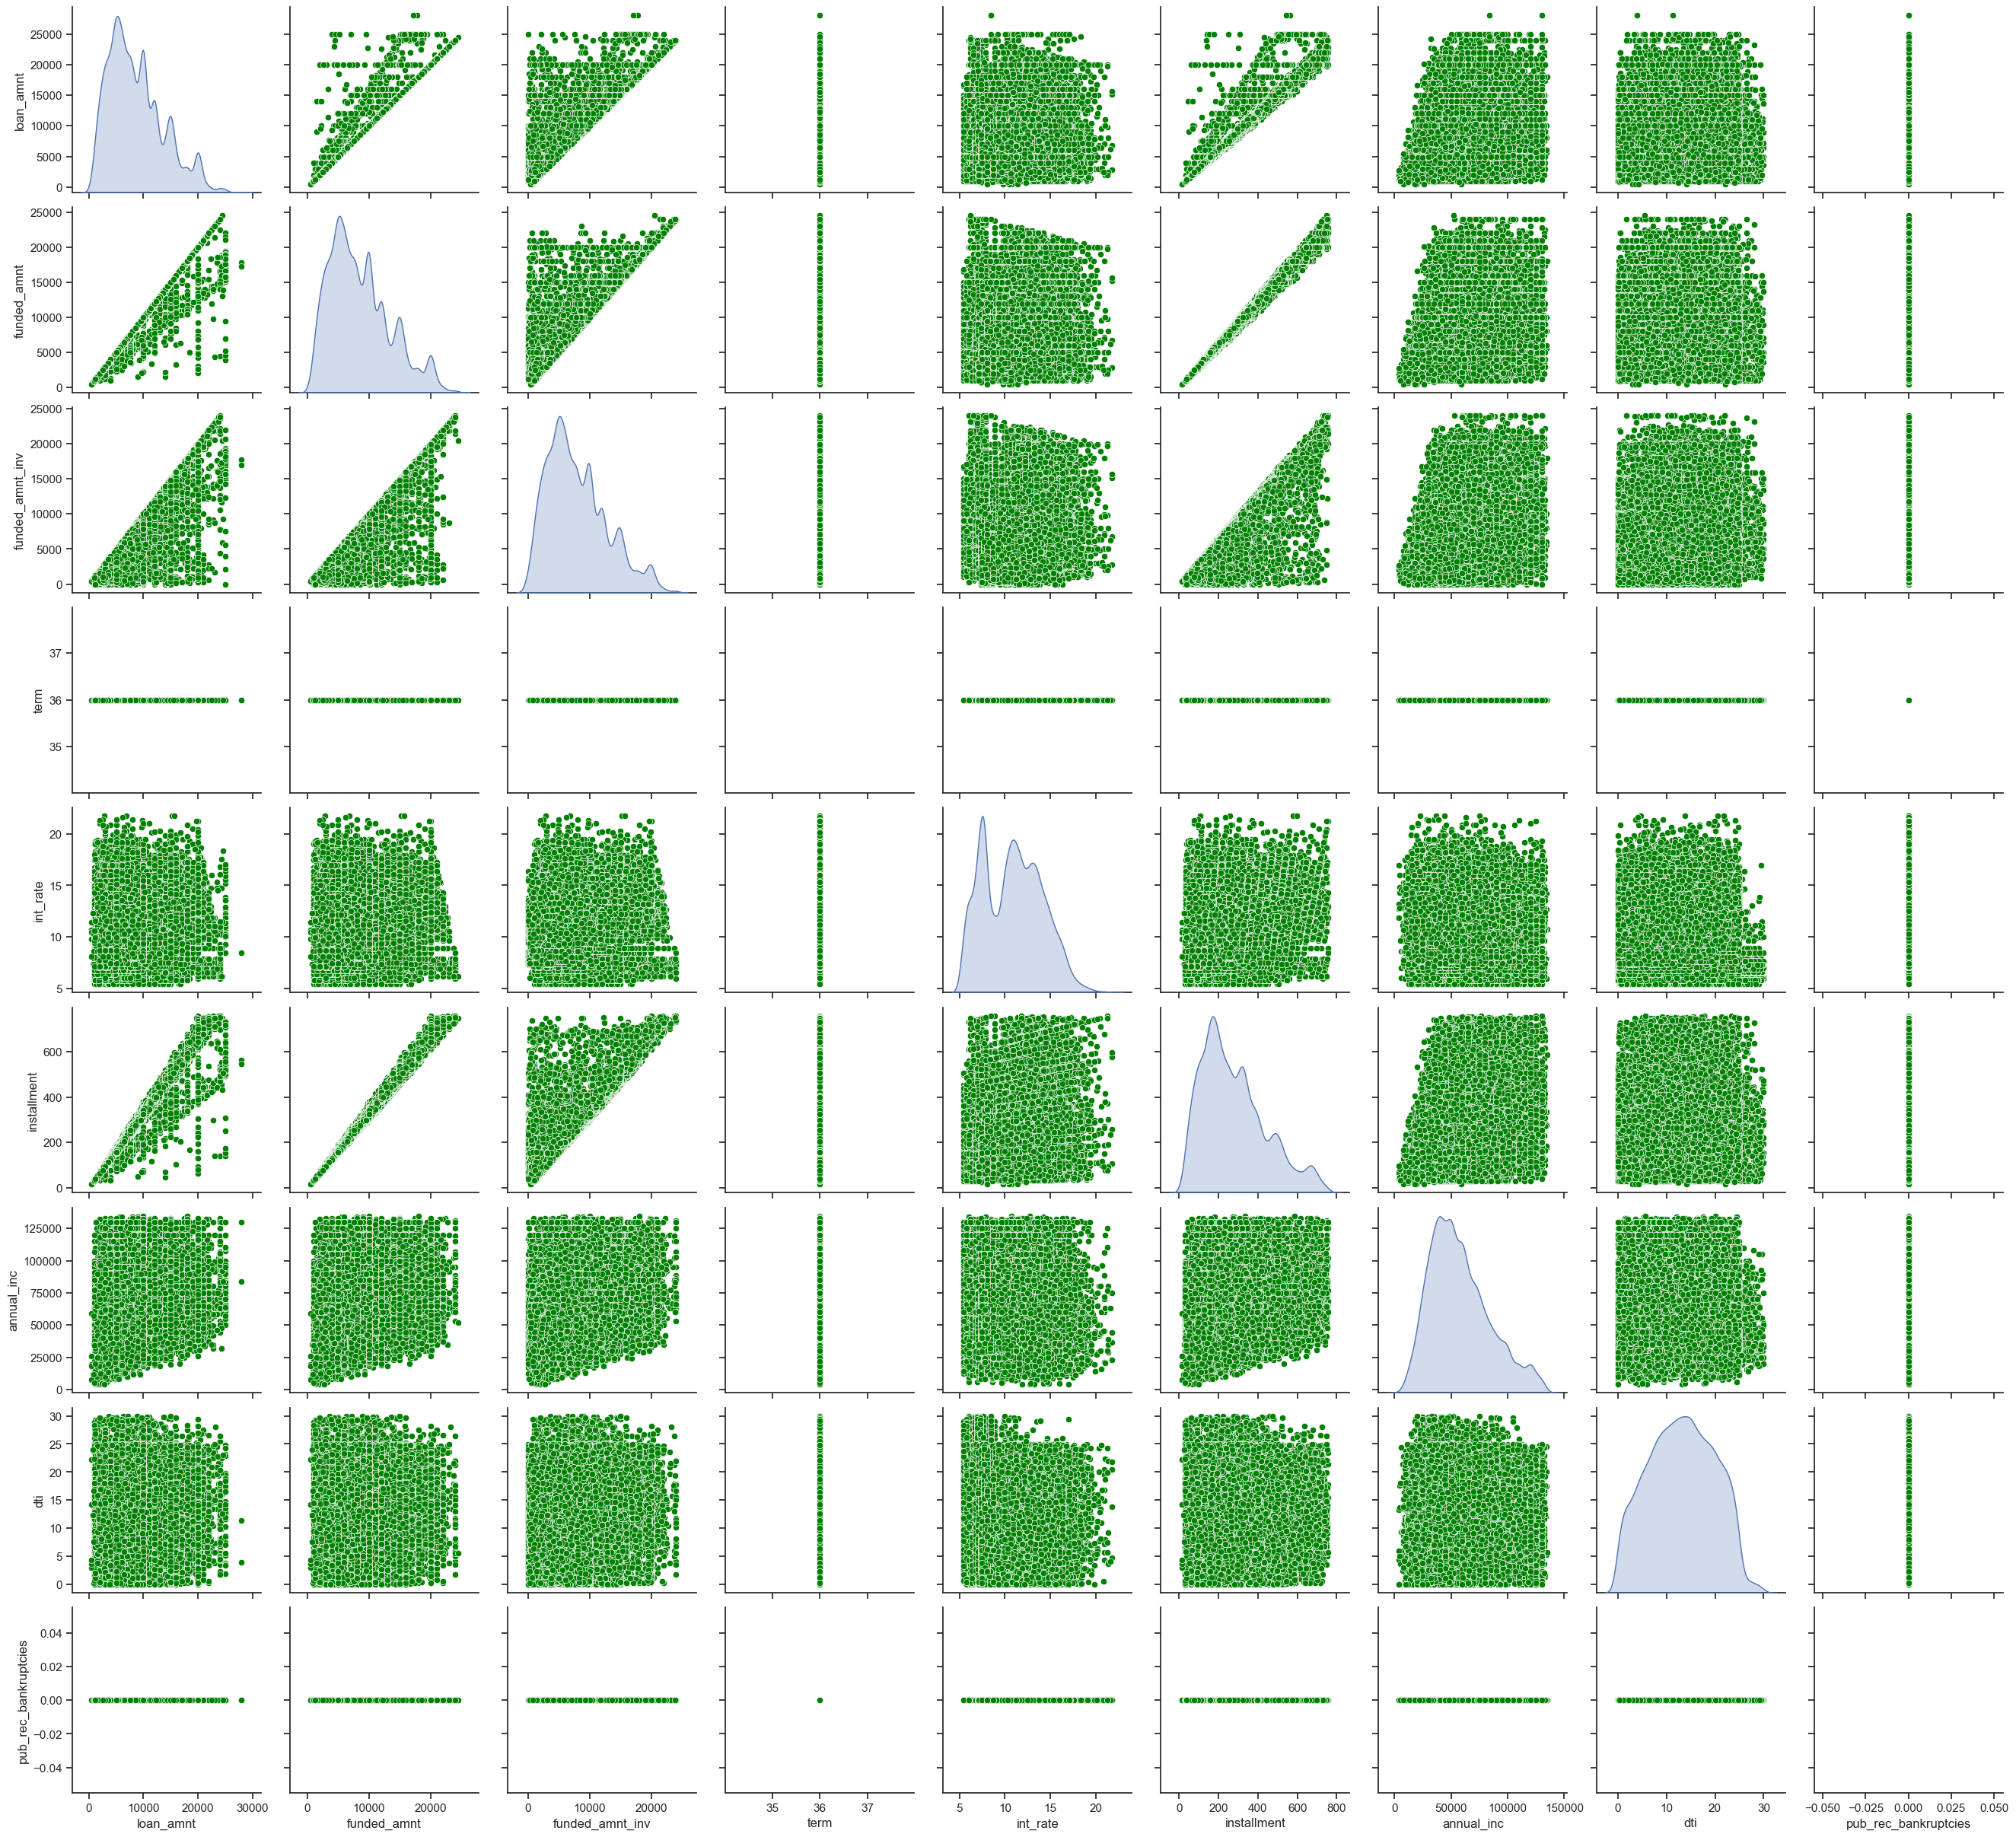

In [93]:
sns.set(style="ticks")

g = sns.pairplot(loan_data_clean[numeric_cols], 
                 diag_kind="kde", 
                 plot_kws=dict(color='green'), 
                 height=3)

# Optionally, adjust layout for better spacing
plt.subplots_adjust(top=0.9)

# Display the plot
plt.show()

## Observations
### Distribution (Diagonal)
#### 1.loan_amnt: Almost like a right-skewed curve, indicating more loans for less amount and fewer loans for higher amount.
#### 2.funded_amnt: distribution is almost the same as loan_amnt. Therefore, most of these loan requests would have been fully funded.
#### 3.funded_amnt_inv: right-skewed also, which may represent the proportion of the investments in these loans.
#### 4.int_rate: The spread of the distribution is large, which might imply a variety of interest rates offered.
#### 5.installment: Right-skewed, which means most of the installments are for smaller amounts.
#### 6.Annual Inc: Strongly Right-skewed, showing that many of the borrowers have low incomes and the distribution skew out with high values.
#### 7.DTI: Shows to have a more uniform distribution with possible concentration by lower value
#### 8.Total Pymnt: Right-skewed, most loans have lower total payments.
#### 9.Total Pymnt Inv: Distribution is similar as total_pymnt

### Specific Observations - Relationships (Scatterplots)

#### 1.loan_amnt vs funded_amnt & funded_amnt_inv: Strong positive linear relationship, which suggests that in general, loan amounts are mostly funded either at the full or very close to the requested amount also on the investor funding end.
#### 2.loan_amnt/funded_amnt vs installment: Positive linear, as expected - the bigger the loans, the higher the installments.
#### 3.loan_amnt/funded_amnt vs int_rate: This can appear to be a weakly positive relation, indicating big loans align with high interest rates. Yet the trend is not very distinguishable because of the many points.
#### 4.int_rate vs installment: Likely positive and makes a high interest rate equivalent to a large installment.
#### 5.annual_inc vs loan_amnt/funded_amnt: Hard to tell if it actually exists, but looks like possibly a positive relationship. Just because of the skew, I could not infer anything from this densely packed scatterplot. High-income earners may borrow bigger amount of loans.
#### 6.dti vs loan_amnt/funded_amnt: Could be very slightly negative, and people with higher dti surely obtain smaller loans; however, that is rather vague in this scenario.
#### 7.total pymnt/total pymnt inv vs loan amnt/funded amnt: Positive relationship, this says that the bigger the loan is the greater is total payments, both for the lender and the investors



# 6.correlation

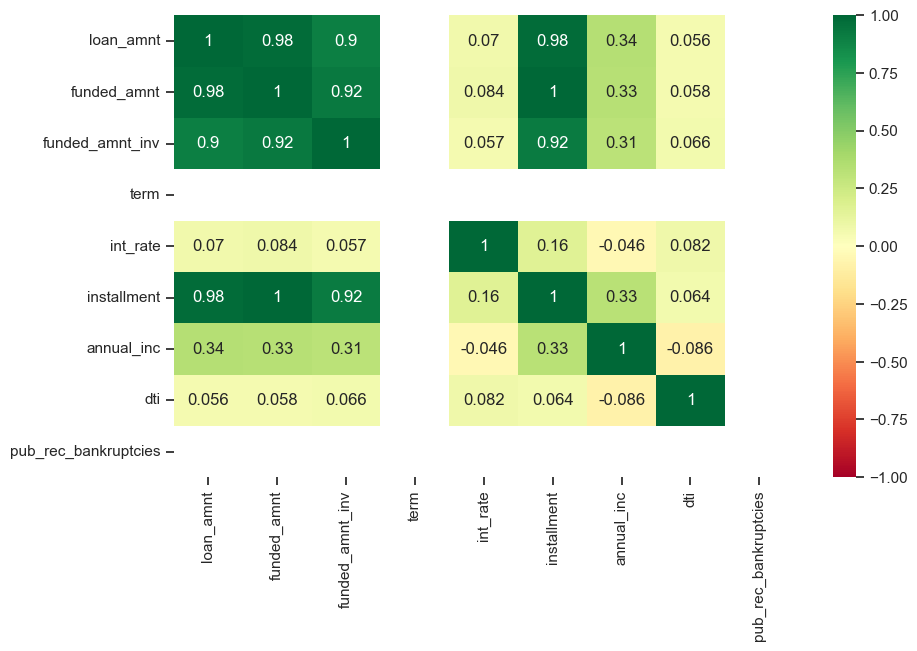

In [96]:
corr_matrix = loan_data_clean[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.show()

## Observations

#### High Positive Correlations:

##### 1.Loan Amount, Funded Amount, Funded Amount Investor: These three variables are highly positively correlated, almost perfectly (the correlation coefficient nearly 1). This indicates they move almost lockstep; with one increase, others tend to increase nearly by the same proportion as well. This is intuitively consistent with the fact that the amount of money funded and invested is directly proportional to the original loan amount.

##### 2.Installation and Loan/Funded Amounts: Installation also shares a high positive correlation with loan amount as well as funded amount. It therefore means that, generally the more the amount borrowed, the higher will be its installment.

#### Moderate Positive Correlation:

##### 1.Annual Income and Loan/Funded Amounts: There is also a moderate positive correlation between the annual income and the loan/funded amounts, pointing to the fact that those individuals earning higher incomes tend to borrow a larger amount.

#### Low Correlations:

##### 1.Interest Rate and others: Interest rate is weakly correlated with most of the variables. This could imply that interest rates are determined by factors not captured in this heatmap.

##### 2.Debt-to-Income Ratio (DTI) and Annual Income: DTI and annual income have a weak negative correlation. This would imply that people with higher incomes possibly have lower DTI, thus possibly meaning that they have a better financial health.